# DS в разработке инновационных решений

Решение **задачи регрессии**.

Для анализа данных полученного DataFrame и дальнейшего построения модели ML, необходимо выполнить ряд следующих действий: 
 - Загрузить DataFrame.

 - Проанализировать общую информацию. Посмотреть размерность данных, найти целевую переменную, посмотреть какие представлены типы столбцов, оценить среднее и минимальное значение по столбцам, оценить количество пропущенных значений в каждом столбце, проанализировать распределение значений по каждому столбцу, посмотреть на наличие выбросов в данных, найти при необходимости их количество, проанализировать показатели корреляции между параметрами, создать при необходимости гиперпараметры, удалить при необходимости лишние столбцы (обосновав это).

 - При необходимости произести шкалирование данных, при наличии выбросов в данных, разных масштабов среди столбцов, или при использовании методов ML чувствительных к масштабу данных (например, линейная регрессия, метод  ближайших соседей).

 - Если необходимо, произвести трансформирование данных, при наличии категориальных параметров.

 - Произвести подготовку данных, создать датасет с фичами и выделить целевую переменную (y).

 - Выбрать методы Ml и метрику ошибки.

 - Проанализировать результативность методов ML и выбрать наилучший вариант решения задачи.

 - Сделать выводы.

# Раздел 1: Анализ и обработка данных

- Создадим блок, в который будем добавлять импорт всех необходимых библиотек. В процессе решения, будем добавлять их именно сюда.

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
# Загрузим DataFtame
df = pd.read_csv("C:/Users/kdm01/OneDrive/Рабочий стол/DataSets/GPN - разр иновац реш/data.csv")

In [3]:
# Выведем первые пять строк нашего DataFrame.
df.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
# Посмотрим общую информацию о DataFrame.
df.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,7.716600,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,1.394603e+00,12.297123,33.641261,0.662440,0.97500,0.9875
std,2.626388,3.985002,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,2.220539e-16,5.337448,25.841363,0.507132,0.01472,0.0075
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,1.394603e+00,5.828000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,1.394603e+00,7.447250,13.677500,0.246000,0.96200,0.9810
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,1.394603e+00,11.092000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,1.394603e+00,15.658000,44.552500,0.882000,0.98800,0.9940
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,1.394603e+00,23.140000,92.556000,1.832000,1.00000,1.0000


Анализируя код ниже, замечаем, что:
- Один единственный параметр имеет единственный тип "int64"
- Только два параметра имеют тип "object".
**Оценим их позже.**

In [5]:
# Посмотрим общую информацию о DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  float64
 12  Давление выдоха Истока          

In [6]:
# Еще раз оценим количесво пропущенных значений. Пропущенных значений в DataFrame нет.
df.isnull().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Температура вдоха Истока          0
Температура выдоха Истока         0
Приток давления Выдоха Истока     0
Давление вдоха Истока             0
Давление выдоха Истока            0
Древний Ветер                     0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Гармония Бессмертия               0
dtype: int64

In [7]:
# Оценим уникальные значения по столбцу "Температура вдоха Истока" и "Давление вдоха Истока", поймем, что они имееют только по одному уникальному значению,
# то есть, эти параметры константы для входа в систему.

# Оценим уникальные значения по столбцу "Температура выдоха Истока" и "Древний Ветер", это два единственных столбца имеющих тип "object".
uniq1 = df['Температура вдоха Истока'].unique()
uniq2 = df['Давление вдоха Истока'].unique()

uniq3 = df['Температура выдоха Истока'].unique()
uniq4 = df['Древний Ветер'].unique()


print(f"Уникальные значения для столбца: 'Температура вдоха Истока' = {uniq1}")
print()
print(f"Уникальные значения для столбца: 'Давление вдоха Истока' = {uniq2}")
print()
print(f"Уникальные значения для столбца: 'Температура выдоха Истока' = {uniq3}")
print()
print(f"Уникальные значения для столбца: 'Древний Ветер' = {uniq4}")


Уникальные значения для столбца: 'Температура вдоха Истока' = [736]

Уникальные значения для столбца: 'Давление вдоха Истока' = [1.394603]

Уникальные значения для столбца: 'Температура выдоха Истока' = ['Исток не вернул выдох' '581.658' '645.642' ... '680.557' '628.95'
 '680.393']

Уникальные значения для столбца: 'Древний Ветер' = ['Древний Ветер развеялся' '1.019' '1.026' '1.03' '1.02' '1.04' '1.022'
 '1.035' '1.049' '1.041' '1.023' '1.05' '1.036' '1.042' '1.031' '1.027'
 '1.051' '1.021' '1.052' '1.043']


- В столбцах "Температура выдоха Истока" и "Древний Ветер" видим такие значения как, **"Исток не вернул выдох"** и **"Древний Ветер развеялся"**, соответсвенно.
- Из истории вселенной Ведьмака понимаем, что эти значения вляются Температрурой воздуха в цельсиях и Энергией. Эти параметры регестрируюстся на выходе из системы.
- **"Исток не вернул выдох"** - предположу, что это значит, что приборы не смогли зарагестрировать температуру воздуха (возможно, вследствии отстуствия энергии, проблем с оборудованиям, нестабильностью источника или потерянных данных).
- **"Древний Ветер развеялся"** - предположу, что значение давления было минимальным и регестрация была невозможна (сведетельсвтует об отсутствии потока, энергии и соответственно давления.)
- Также видим, что явления нерегестрации температуры и давления **происходят параллельно** (проверим это ниже), что действительно может сведетельствать об отсутвии потока. Ведь вероятность поломки термометра и бараметра одновременно и строго параллельно, крайне мала !!!
- Будем считать эти параметры как **пропущенные значения**!


In [8]:
# Оценим, совпадает ли количество явлений "нерегестрации" температуры и давления. Найдем количество нерегестрации температуры и давления.

shape1 = df[df['Температура выдоха Истока'] == 'Исток не вернул выдох'].shape[0]
shape2 = df[df['Древний Ветер'] == 'Древний Ветер развеялся'].shape[0]

print(f'Кольчество строк, с незафиксированной температурой: {shape1}')
print(f'Кольчество строк, с незафиксированным давлением: {shape2}')

if shape1 == shape2:
    print('Количество явлений совпадает')
else:
    print('Разное количество явлений')

# Но, мы не можем быть точно уверены, что явления происходят параллельно.

Кольчество строк, с незафиксированной температурой: 9547
Кольчество строк, с незафиксированным давлением: 9547
Количество явлений совпадает


- Мы поняли, что количество явлений одинаково. Осталось оценить, что эти явления происходят **параллельно**!

- Если явления происходят строго параллельно, это скажет нам, об их прямой зависимости.

Создан DataFrame объединяющий эти явления ('Исток не вернул выдох' и 'Древний Ветер развеялся'). Посчитаем их количество. 

Если количество строк нового DataFrame, который объединяет эти два явления, **сповпадает** с количеством каждого явления (9547) с предыдущего шага, значит, что явления нерегестрации температуры и давления происходят **строго параллельно**.

In [9]:
# Так же оценим, что эти явления происходят параллельно.

parall = df[(df['Температура выдоха Истока'] == 'Исток не вернул выдох') & (df['Древний Ветер'] == 'Древний Ветер развеялся')].shape[0]
print(parall)

if parall == shape1 == shape2:
    print('Явления нерегестрации температуры и давления происходят одновременно и параллельно!')
else:
    print('Не параллельно')

9547
Явления нерегестрации температуры и давления происходят одновременно и параллельно!


Выяснено, что явления нерегестрации температуры и давления происходят одновременно, соответственно между ними прямая взаимосвязь.

- Так как ранее было выяснено, что параметры "Температура вдоха Истока" и "Давление вдоха Истока" имеют по одному уникальному значению, **исключим** их из DataFrame, поскольку **константы** никакой информации для моделей ML не несут.

In [10]:
# Удалим из нашего DataFrame константные значения, поскольку никой информации для будущей модели они не несут.
df = df.drop(columns=["Температура вдоха Истока", "Давление вдоха Истока"], axis = 1)

- Далее работа с новым DataFrame - **df_new**

In [11]:
# Заменим явления 'Исток не вернул выдох' и 'Древний Ветер развеялся' на NaN, обозначая их как пропущенное значение.

df_new = df.copy()
df_new['Температура выдоха Истока'] = df_new['Температура выдоха Истока'].replace('Исток не вернул выдох', np.nan)
df_new['Древний Ветер'] = df_new['Древний Ветер'].replace('Древний Ветер развеялся', np.nan)

In [12]:
# Посмотрим что получилось
df_new.head(3)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,NaN,1.096,5.947,NaN,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,NaN,1.389,7.574,NaN,13.086,0.259,0.95,0.975


In [13]:
# Проверим количество пропущенных значений
df_new.isnull().sum()

Вектор Мощи                          0
Скорость перехода через портал       0
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура выдоха Истока         9547
Приток давления Выдоха Истока        0
Давление выдоха Истока               0
Древний Ветер                     9547
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Гармония Бессмертия                  0
dtype: int64

- Столбцы "Температура выдоха Истока" и "Древний Ветер" имеют по 9547 пропущенных значения.

- Это **80% пропущенных значений** всех данных по столбцу (9547/11934 = 0.7999).

- Оценим значимость этих столбцов позже, запомнив о таком большом количестве пропусков.

- Необходимо проверить признаки DataFrame на корреляцию. Для этого построим корреляционную матрицу и проанализируем результат.

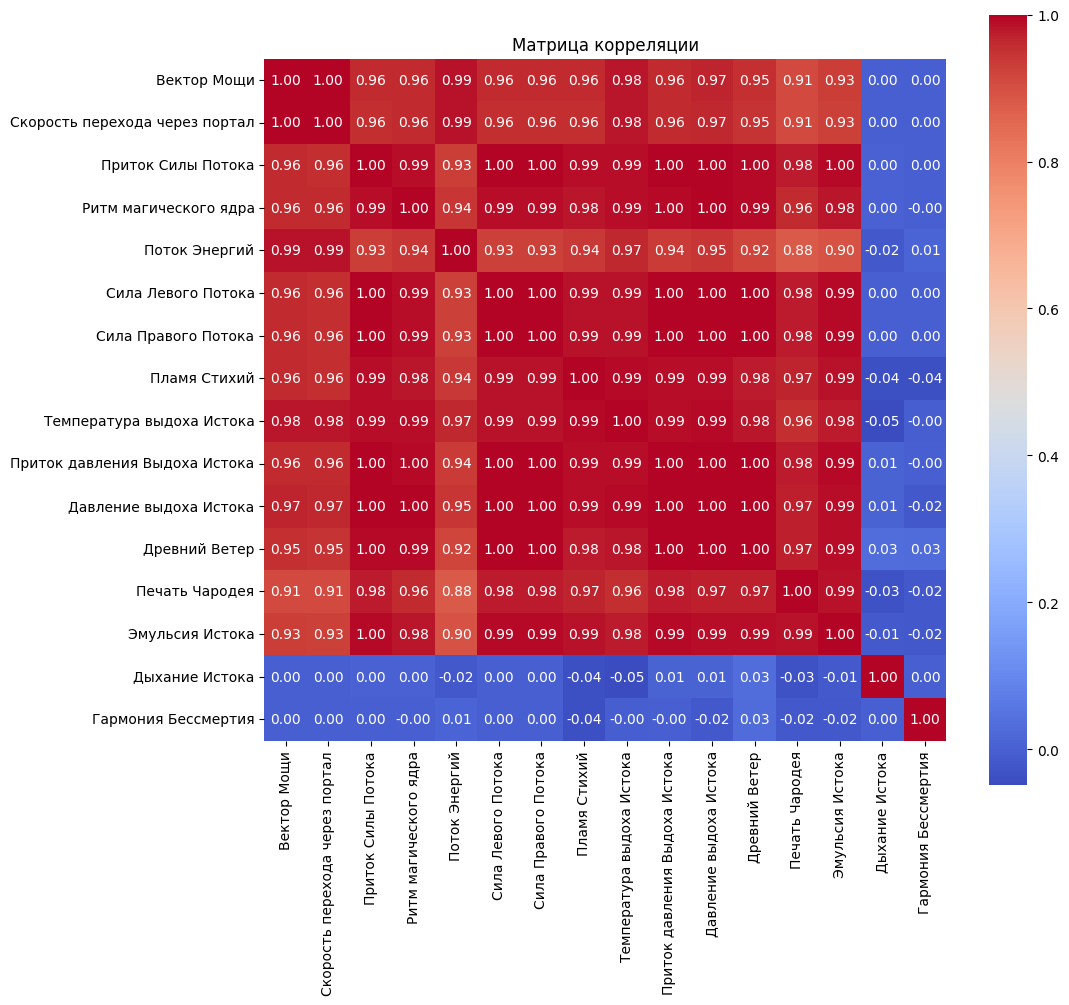

In [14]:
# Построим корреляционную матрицу для всех параметров в нашем DataFrame
correlation_matrix = df_new.corr()

plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

- Корреляция почти между всеми параметрами очень большая (0.88+).

- Практически все параметры очень слабо коррелируют с целевой переменной, "Гармония Бессмертия".

- Видно, что очень сильное влияние почти всех столбов друг на друга. И очень слабое влияние на целевой столбец.

In [15]:
# Видим что корреляция между 'Сила Левого Потока', 'Сила Правого Потока' и 'Приток Силы Потока' равна 1
# Создадим новую переменную, для более полной картины суммарной силы всех потоков
df_new['Полная мощность потоков'] = df_new['Сила Левого Потока'] + df_new['Сила Правого Потока'] + df_new['Приток Силы Потока']

- Создадим новый параметр "Полная мощность потоков".

- Оценим корреляцию других параметров с параметром "Полная мощность потоков" - (она очень высокая).

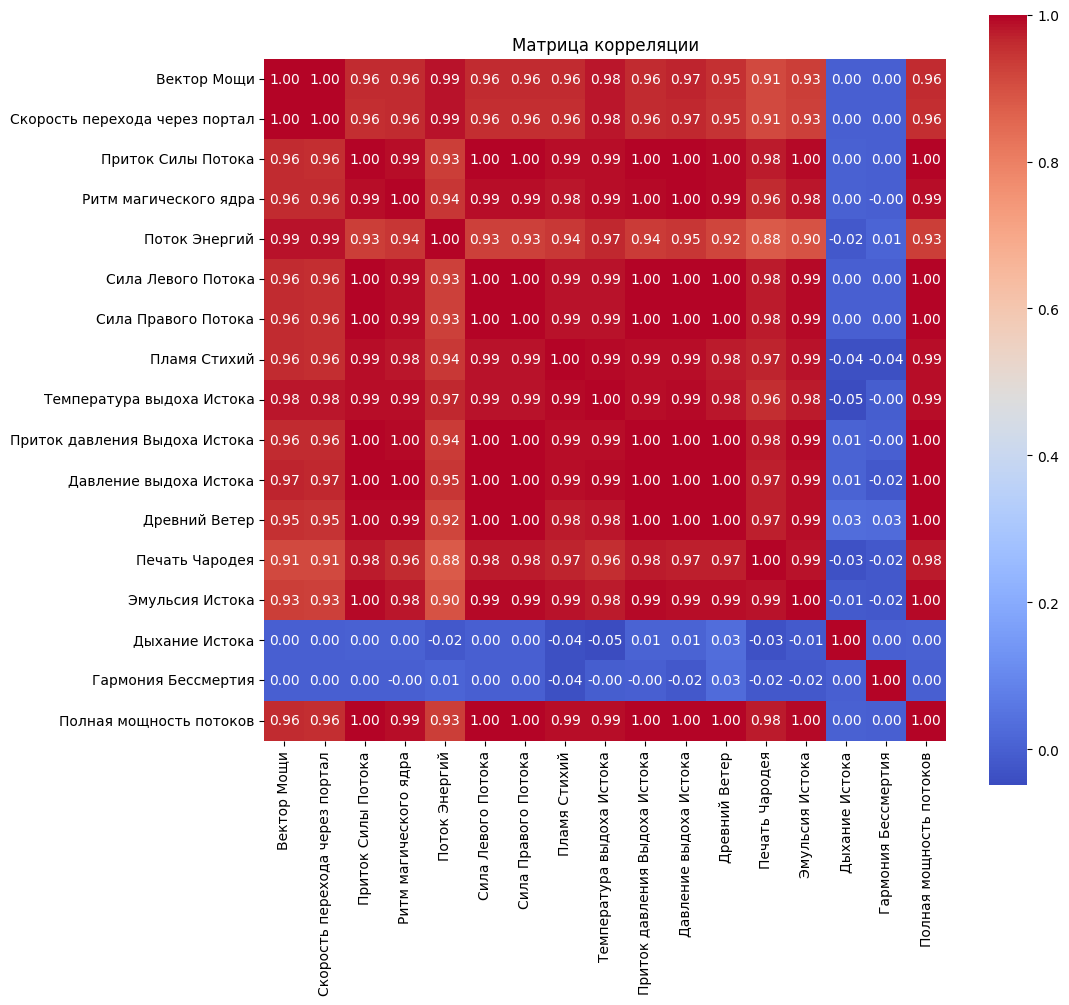

In [16]:
# Оценим корреляцию

correlation_matrix = df_new.corr()

plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

#### Добавление гиперпараметров

- Добавим в DataFrame большую часть новых столбцов, исходя из информации, содержащийся в разделе "Дополнительные рекомендации по работе с данными". Создание и добавление гиперпараметров, необходимо, для более четкого понимания картины взаимосвязи данных.

- Проанализируем корреляцию остальных параметров и новых, только что созданных.

- Проанализируем кореляцию новых параметров с целевой переменной.

```
Почему добавлены все гиперпараметры ?

- При добавлении всех гиперпараметров, мы однозначно не сделаем себе хуже. Чем больше параметров, тем больше данных, а это хорошо как для нас, так и для методов ML.

- При наличии большего количества данных, мы сможем лучше понять их взаимосвязь друг с другом, более обьективно оценить корреляцию параметров, их важность и значимость для моделей ML. Возможно, какой-то гиперпараметр будет чрезвычайно важен для моделей ML.

- Добавляем все гиперпараметры, анализируем их и при необходимости удаляем.
```

In [17]:
# Добавление гиперпараметров.
df_new['Общая мощность ядра'] = df_new['Ритм магического ядра'] * df_new['Приток Силы Потока']
df_new['Общее давление'] = df_new['Приток давления Выдоха Истока'] + df_new['Давление выдоха Истока']
df_new['Магическая производительность'] = df_new['Скорость перехода через портал'] / df_new['Эмульсия Истока']
df_new['Эффективность ядра'] = df_new['Общая мощность ядра'] / df_new['Эмульсия Истока']
df_new['Степень износа'] = df_new['Дыхание Истока'] / df_new['Гармония Бессмертия']
df_new['Разница стабильности'] = abs(df_new['Дыхание Истока'] - df_new['Гармония Бессмертия'])
df_new['Баланс угасания'] = (df_new['Дыхание Истока'] - df_new['Гармония Бессмертия']) / df_new['Скорость перехода через портал']

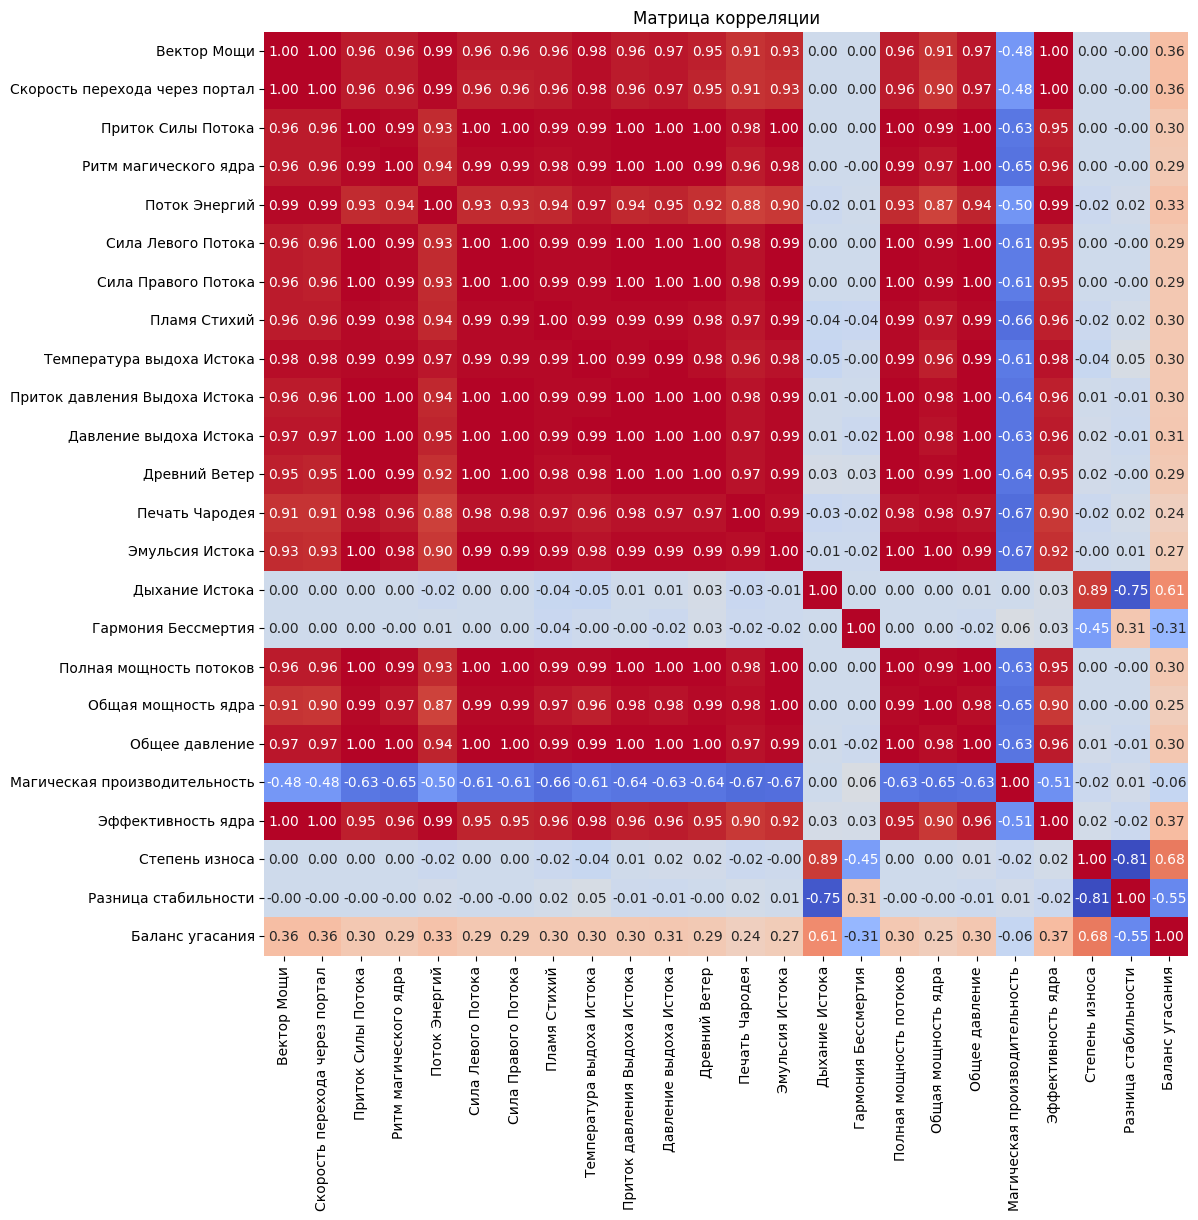

In [18]:
# Оценим ОБЩУЮ корреляцию после добавления всех параметров.
correlation_matrix = df_new.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

# Решение задачи выполнено двумя вариантами

- При решении задачи тестировались разные гипотезы. Данная задача регресии решена двумя абсолютно разными вариантами.

- В конце каждого варианта решения есть свой промежуточный вывод.

- В конце задачи подведен общий итог, в котором выбирается, как метод решения, так и модель ML.

# Вариант №1 - строим модель без удаления коррелирующих столбцов

- Для начала протестируем первую стратегию:
  
    1. Не будем сразу удалять все сильно коррелирующие столбцы. Т.к мы не можем в полной мере понимать их значимость для моделей ML. Через матрицу корреляции, мы видим только взаимосвязь признаков друг с другом. Но, удалив сильно коррелирующий столбец, мы можем потерять **значимый признак** для решения задачи регресии и получить более слабую модель.
 
    2. Вместо удаления коррелирующих столбцов, загрузим все признаки и обучим на них модель ML. Далее оценим значимость признаков для нашей модели, выберем для себя "отсечку" значимости признаков и удалим все признаки ниже нашего порогового значения.

## Подготовка данных

In [19]:
# Обозначим целевую переменную как y и остальные параметры как X
X = df_new.drop(['Гармония Бессмертия'], axis = 1)
y = df_new['Гармония Бессмертия']

In [20]:
feature_names = X.columns

## Масштабирование данных: StandardScaler

In [21]:
# Произведем масштабирование данных
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [22]:
# Разобьем данные на тестовую и тренировочную выборку. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=230) 

- test_size = 0.40, задаем размерность тестовой выборки. Это значит, что весь DataFrame разобьется в соотношении 60 к 40, на 60% модель обучается и на 40% тестируется.
- random_state = 250 - это фиксированное перемешивание данных в DataFrame. Меняя random_state, мы показываем модели данные, которые она раньше не видела. Это предотвращает "подстраивание" модели под тестовую выборку.

```
Изначально решение было выполнено вариантом решения №2. В данном варианте решения №1 я выбрал 3 самых сильных метода, исходя из опыта решения варианта №2.

На основе метода Extreme Gradient Boosting, Random Forest и CatBoost воспользуюсь feature_importances_ и .get_feature_importance(), и проанализирую важность всех фичей в DataFrame.

В варианте решения № 1, протетирую 3 метода ML:

    1. Extreme Gradient Boosting.
    2. Метод ближайших соседей.
    3. Random Forest.

После удаления малозначимых параметров проанализируем, как справятся эти методы с большим количеством сильно коррелирующих параметров.
```

## Метод: Extreme Gradient Boosting

- Обучим модель на большом количестве сильно коррелирующих данных.

- Метод Extreme Gradient Boosting имеет высокую скорость обучения, относительно других выбранных методов. Поэтому, для этой задачи был выбран именно он.

- После обучения модели, воспользуемся feature_importances_ для выявления значимости фичей.

In [23]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Запишем необходимые нам параметры для дальнейшего перебора.
param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]    
}

# Сделаем перебор заданных выше параметров, при этом разделив выборку данных на 5 частей.
grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

# Обучим модель на тренировочных данных
grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [24]:
# Посмотрим лучшие параметры, дающие максимальный прирост Information gain
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1.0}

In [25]:
# Сохраним эти параметры в новую переменную, чтобы далее с ними работать
best_gs_xgb = grid_search__xgb.best_estimator_

In [26]:
print('Score на тренировочных данных = ', round(best_gs_xgb.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_gs_xgb.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9996
Score на тестовых данных =  0.9994


In [27]:
# Воспользуемся feature_importances_ чтобы получить array важности всех фичей в данных
# Данный вывод array нам ничего не говорит, необходимо преобразовать его в более читаемый вид.
best_gs_xgb.feature_importances_

array([0.        , 0.        , 0.00063982, 0.00138268, 0.        ,
       0.        , 0.        , 0.00159523, 0.        , 0.        ,
       0.00062524, 0.        , 0.03453394, 0.        , 0.1528045 ,
       0.        , 0.00215092, 0.        , 0.00427516, 0.        ,
       0.16244023, 0.6219273 , 0.01762487], dtype=float32)

In [28]:
# Сохраним в отдельную переменную, чтобы создать DataFrame (для читаемости)
feature_importances = best_gs_xgb.feature_importances_

In [29]:
# Создадим DataFrame для наглядности.
# Смотрим важность фичей в нашем DataFrame
feature_importances_df = pd.DataFrame({'features': feature_names,
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=0)

,features,feature_importances
21,Разница стабильности,0.621927
20,Степень износа,0.162440
14,Дыхание Истока,0.152804
12,Печать Чародея,0.034534
22,Баланс угасания,0.017625
18,Магическая производительность,0.004275
16,Общая мощность ядра,0.002151
7,Пламя Стихий,0.001595
3,Ритм магического ядра,0.001383
2,Приток Силы Потока,0.000640


- В DataFrame выше, показаны все фичи по **убыванию их важности**.
- Но, основная проблема заключается в том, что при изменении параметра **random_state**, в команде разбиения датасета на тестовую и тренировочную выборки, важность фичей и их место в "градации по важности", будет меняться.
  
```
- Почему это так происходит? Это связано с тем, что меняя random_state, набор данных буквально перемешивается. И метод ML, фактически получает на вход новые данные. Далее, в новых данных он находит новые значения и новые вариации построения дерева решений (Дерево решений, т.к. метод feature_importances_ использовался в методе exgBoosting, который в свою очередь работает на основе алгоритмов деревьев решений). Находя новые вариации построения деревьев решений, могут изменяться сплиты разных параметров, изменяется прирост Information gain, следовательео может меняться и значимость различных столбцов.
```

- То есть, если при random_state=250, важность параметра "Эффективность ядра" = 0.000000, то при random_state=350, важность этого параметра будет уже 0.000876. То есть, **минимальный вклад этот параметр уже вносить будет**.
- Чтобы решить этот вопрос, и не удалить фичи которые сейчас нам кажутся **бесполезны**, а потенциально оказывается, что они могут **принести пользу**, напишем цикл, прогоняющий фичи несколько раз и выведем среднее значение и медиану для разных комбинаций фичей, при разном random_state.

In [30]:
n_runs = 4
importances_list = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=250 + i)
    
    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')
    grid_search_xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5, n_jobs=-1)
    
    grid_search_xgb.fit(X_train, y_train)
    best_model = grid_search_xgb.best_estimator_
    
    feature_importances = best_model.feature_importances_
    importances_list.append(feature_importances)

importances_df = pd.DataFrame(importances_list, columns=feature_names)

importances_summary_xg = pd.DataFrame({
    'feature': feature_names,
    'mean_importance': importances_df.mean(),
    'median_importance': importances_df.median()})

importances_summary_xg.sort_values('mean_importance', ascending=False)

,feature,mean_importance,median_importance
Разница стабильности,Разница стабильности,0.420047,0.477178
Степень износа,Степень износа,0.233049,0.217688
Дыхание Истока,Дыхание Истока,0.213877,0.200852
Баланс угасания,Баланс угасания,0.101682,0.105583
Эмульсия Истока,Эмульсия Истока,0.011093,0.000379
Ритм магического ядра,Ритм магического ядра,0.007024,0.003777
Печать Чародея,Печать Чародея,0.005511,0.003834
Магическая производительность,Магическая производительность,0.004655,0.004573
Эффективность ядра,Эффективность ядра,0.000665,0.000757
Приток Силы Потока,Приток Силы Потока,0.000552,0.000599


**Для обьективности** проведем такой же тест для метода Random Forest. 

```
Оценим какие фичи важны для метода RF и сравним их с методом Extreme Gradient Boosting
```

- Проанализируем важность фичей и для модели Random Forest.

## Метод: Random Forest

In [31]:
reg_forest = RandomForestRegressor()

# Распишем параметры для теста через GridSearchCV.
parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

# Прогоним модель RF, тестируя вышеперечисленные параметры, разделив выборку на 5 частей.
grid_search_reg_forest3 = GridSearchCV(reg_forest, parametrs_fr, cv = 5)

# Обучим на тренировочных данных.
grid_search_reg_forest3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [32]:
# Посмотрим на лучшие параметры.
grid_search_reg_forest3.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 100}

In [33]:
# Оценим коэффициент детерминации - точность предсказанных значений.
best_rf_reg3 = grid_search_reg_forest3.best_estimator_

In [34]:
print('Score на тренировочных данных = ', round(best_rf_reg3.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_rf_reg3.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9515
Score на тестовых данных =  0.9462


In [35]:
# Воспользуемся feature_importances_ для выявления самых значимых фичей для метода RF.
best_rf_reg3.feature_importances_

array([1.63583057e-04, 1.41154756e-04, 2.32650318e-02, 1.35890846e-02,
       8.41711649e-03, 3.35430026e-03, 3.45167706e-03, 1.36296696e-02,
       1.95103242e-04, 3.13712881e-03, 4.45122748e-02, 1.00812993e-04,
       2.09247079e-02, 1.16660306e-02, 2.69395777e-01, 2.22049383e-02,
       1.83463804e-02, 3.44729056e-02, 1.69081373e-02, 4.46780729e-02,
       2.23306282e-01, 1.53749370e-01, 7.03904605e-02])

In [36]:
feature_importances2 = best_rf_reg3.feature_importances_

In [37]:
# Сохраним для визуализации в DataFrame
feature_importances_df2 = pd.DataFrame({'features': feature_names,
                                       'feature_importances': feature_importances2})
feature_importances_df2.sort_values('feature_importances', ascending=0)

,features,feature_importances
14,Дыхание Истока,0.269396
20,Степень износа,0.223306
21,Разница стабильности,0.153749
22,Баланс угасания,0.070390
19,Эффективность ядра,0.044678
10,Давление выдоха Истока,0.044512
17,Общее давление,0.034473
2,Приток Силы Потока,0.023265
15,Полная мощность потоков,0.022205
12,Печать Чародея,0.020925


- Описав выше проблему random_state, для обьективности важности фичей, воспользуемся циклом, прогнав фичи через изменяющийся random_state и сохраним их среднее и медианное значение.

In [38]:
n_runs = 3
importances_list = []

for i in range(n_runs):
    # Разделение данных с разными random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=250 + i)
    
    reg_forest = RandomForestRegressor()
    grid_search_reg_forest3 = GridSearchCV(reg_forest, parametrs_fr, cv = 5)
    
    grid_search_reg_forest3.fit(X_train, y_train)
    best_rf_reg3 = grid_search_reg_forest3.best_estimator_
    
    feature_importances = best_rf_reg3.feature_importances_
    importances_list.append(feature_importances)

importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Рассчитаем среднее и медиану важности для каждой фичи
importances_summary_rf = pd.DataFrame({
    'feature': feature_names,
    'mean_importance': importances_df.mean(),
    'median_importance': importances_df.median()})

# Выведем отсортированный DataFrame, по среднему значению
importances_summary_rf.sort_values('mean_importance', ascending=False)

,feature,mean_importance,median_importance
Дыхание Истока,Дыхание Истока,0.256144,0.255604
Степень износа,Степень износа,0.210426,0.211637
Разница стабильности,Разница стабильности,0.148022,0.151398
Баланс угасания,Баланс угасания,0.085251,0.086555
Эффективность ядра,Эффективность ядра,0.049592,0.049775
Давление выдоха Истока,Давление выдоха Истока,0.046335,0.045020
Общее давление,Общее давление,0.031224,0.032066
Приток Силы Потока,Приток Силы Потока,0.026739,0.026535
Печать Чародея,Печать Чародея,0.026524,0.025854
Полная мощность потоков,Полная мощность потоков,0.021697,0.022850


Представленные выше фичи - это отсортированный DataFrame по **важности** столбцов нашего DataFrame для метода **Random Forest**.

## Метод: CatBoost

- Так же воспользуемся библиотекой ML разработанной Яндексом - CatBoost.

- Этот алгоритм машиного обучения имеет метод - .get_feature_importance().

- Данный метод чуть более гибкий в отличии от предыдущего .feature_importances_ :

    - CatBoost автоматически обрабатывает категориальные признаки, что делает его более точным на реальных данных.
    - CatBoost более устойчив к случайным вариациям в данных по сравнению с XGBoost, т.к он использует метод "Ordered Boosting". Это позволяет получить более стабильную оценку важности признаков.
    - CatBoost менее подвержен переобучению.

- Так же, вывод важности параметров через метод .get_feature_importance() более нагляден, т.к в сумме все параметра образуют значение 100 и сразу видно, какой вклад вносит каждый столбец в модель.

In [39]:
catboost_regressor = CatBoostRegressor(loss_function='MAE', silent=True)

param_catboost = {
    'iterations': [150, 300],
    'learning_rate': [0.1, 0.2],
    'depth': [5, 10],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search_catboost = GridSearchCV(catboost_regressor, param_catboost, cv=3)

grid_search_catboost.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CBFEB2C890>,
             param_grid={'depth': [5, 10], 'iterations': [150, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.2]})

In [40]:
grid_search_catboost.best_params_

{'depth': 10, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [41]:
best_gs_catboost = grid_search_catboost.best_estimator_

In [42]:
print('Score на тренировочных данных = ', round(best_gs_catboost.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_gs_catboost.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9997
Score на тестовых данных =  0.9993


In [43]:
# Получаем важность признаков с помощью метода get_feature_importance
feature_importances = best_gs_catboost.get_feature_importance()

In [44]:
# Создаем DataFrame для удобного представления результатов
feature_importances_df = pd.DataFrame({
    'features': feature_names, 
    'feature_importances': feature_importances
})

feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
14,Дыхание Истока,47.117024
21,Разница стабильности,27.165609
20,Степень износа,21.673519
22,Баланс угасания,2.974506
12,Печать Чародея,0.219014
19,Эффективность ядра,0.160511
2,Приток Силы Потока,0.134209
18,Магическая производительность,0.092876
9,Приток давления Выдоха Истока,0.091943
16,Общая мощность ядра,0.078366


- Видем выше DataFrame - градация от самых важных признаков к менее важным, по методу CatBoost.

```
Проанализировав 3 DataFrame, выводящие градации всех столбов по их важности и значимости, для методов: Extreme Gradient Boosting, RandomForest и CatBoost, заметим, что верхний пласт самых значимых параметров, не меняется от метода в методу!
```
**Самые важные параметры**, их 4: Дыхание Истока, Разница стабильности, Степень износа, Баланс угасания.	
```
Эти параметры однозначно должны быть в DataFrame.

Остальные параметры, тоже играют некоторую роль, но их значимость существенно ниже, особенно у самых последних.

Параметры вносящие минимальный вклад или не вносящие вовсе, от таких параметров лучше избавляться. Так, мы упростим сам DataFrame и улучшим обобщающую способность модели.
``` 

### Построим график для визуализации важности параметров 

- Сохраним в отдельные переменные итоговый, отсортированный по среднему значению список важности столбцов, для двух моделей.

In [45]:
importances_summary_xgb = importances_summary_xg.sort_values('mean_importance', ascending=False).reset_index(drop=True)
importances_summary_rrf = importances_summary_rf.rename(columns={'mean_importance': 'RF_mean_importance'})

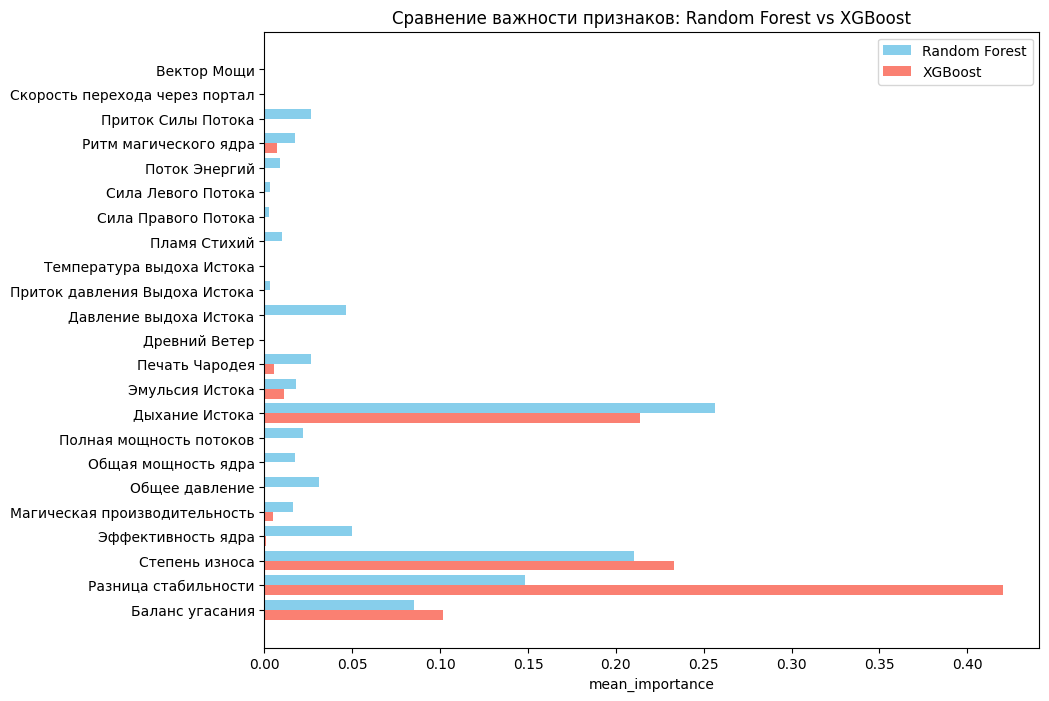

In [46]:
# Создадим общую таблицу, где будут важности признаков обоих методов
importances_summary_rf = importances_summary_rf.rename(columns={'mean_importance': 'RF_mean_importance'})
importances_summary_xgb = importances_summary_xgb.rename(columns={'mean_importance': 'XGB_mean_importance'})

# Объединим таблицы по признакам
combined_importances = pd.merge(importances_summary_rf[['feature', 'RF_mean_importance']],
                                importances_summary_xgb[['feature', 'XGB_mean_importance']],
                                on='feature')

# Построим график
plt.figure(figsize=(10, 8))
indices = np.arange(len(combined_importances))

plt.barh(indices - 0.2, combined_importances['RF_mean_importance'], height=0.4, label="Random Forest", color='skyblue')
plt.barh(indices + 0.2, combined_importances['XGB_mean_importance'], height=0.4, label="XGBoost", color='salmon')

plt.yticks(indices, combined_importances['feature'])
plt.xlabel('mean_importance')
plt.title('Сравнение важности признаков: Random Forest vs XGBoost')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

- На данном графике сразу можно заметить 4 самых важных столбца, как для метода XGBoost так и для Random Forest.

- Остальные же столбцы, могут быть менее важны для одной модели и чуть более важны для другой.

### Удаление фичей

- Оценим важность фичей для трех методов ML:
  1. Метод: Extreme Gradient Boosting
  2. Метод: Random Forest
  3. Метод: CatBoost

Проанализируем три DataFrame с отсортированными, средними значениями важных фичей. Проанализируем график. 
- Выберем отсечку и удалим столбцы с оценкой важности, ниже заданной отсечки.

Возьмем для нашей "отсечки", значения **не ниже 0.0003** по среднему значению у модели XGBoost. **Не будем убирать** параметр **'Общее давление'**, хотя он имеет значение важности 0.000170 для метода Extreme Gradient Boosting, но он так же входит в топ-8 для метода Random Forest и в топ-7 для CatBoost, что достаточно неплохо.

- Удалим все фичи ниже этого значения.

In [47]:
# Сохраняем новый DataFrame, с самыми значимыми фичами в новую переменную, удаляя все фичи со заченями ниже 0.0003 по mean. 
df_new_two = df_new.drop(['Температура выдоха Истока', 'Полная мощность потоков', 
                          'Поток Энергий', 'Вектор Мощи', 'Скорость перехода через портал', 'Приток давления Выдоха Истока',
                          'Сила Правого Потока', 'Сила Левого Потока', 'Древний Ветер'], axis = 1)

- Все эти удаленные фичи, не вносят особо никакой вклад в модели, исходя из анализа важности фичей трех вышеперечисленных методов.

In [48]:
# Посмотрим на новый DataFrame
df_new_two

,Приток Силы Потока,Ритм магического ядра,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Общая мощность ядра,Общее давление,Магическая производительность,Эффективность ядра,Степень износа,Разница стабильности,Баланс угасания
0,289.964,141.318158,464.006,5.947,7.137,0.082,0.95,0.975,4.097718e+04,7.043,18.820976,4.997217e+05,0.974359,0.025,-0.016199
1,6960.180,144.111767,635.401,7.282,10.655,0.287,0.95,0.975,1.003044e+06,8.613,10.754843,3.494926e+06,0.974359,0.025,-0.008099
2,8379.229,145.220853,606.002,7.574,13.086,0.259,0.95,0.975,1.216839e+06,8.963,17.876293,4.698219e+06,0.974359,0.025,-0.005400
3,14724.395,162.050156,661.471,9.007,18.109,0.358,0.95,0.975,2.386091e+06,10.665,17.243799,6.665057e+06,0.974359,0.025,-0.004050
4,21636.432,201.513586,731.494,11.197,26.373,0.522,0.95,0.975,4.360035e+06,13.275,14.782759,8.352557e+06,0.974359,0.025,-0.003240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,21624.934,201.516623,681.658,10.990,23.803,0.471,1.00,1.000,4.357784e+06,13.077,16.383439,9.252195e+06,1.000000,0.000,0.000000
11930,29763.213,241.561772,747.405,13.109,32.671,0.647,1.00,1.000,7.189654e+06,15.621,14.312087,1.111229e+07,1.000000,0.000,0.000000
11931,39003.867,280.444950,796.457,15.420,42.104,0.834,1.00,1.000,1.093844e+07,18.402,12.953525,1.311563e+07,1.000000,0.000,0.000000
11932,50992.579,323.315332,892.945,18.293,58.064,1.149,1.00,1.000,1.648668e+07,21.887,10.745483,1.434872e+07,1.000000,0.000,0.000000


- По итогу получилась не совсем "красивая" матрица корреляции. Но, достоверно известно, что **лишние столбцы удалены не были**.

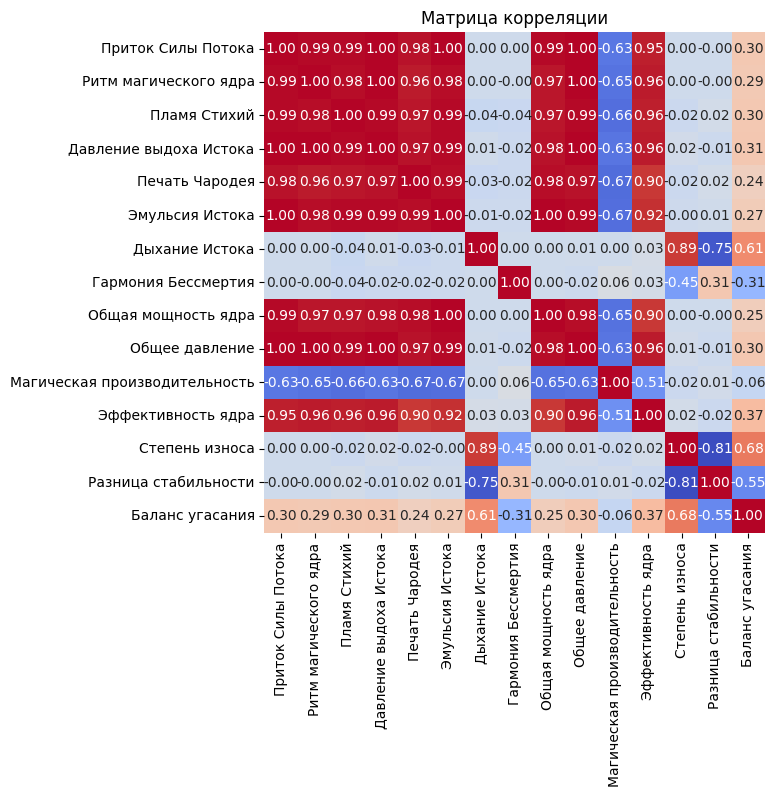

In [49]:
correlation_matrix = df_new_two.corr()

plt.figure(figsize=(6.5, 6.5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

## Machine Learning 

- Протестируем на новом DataFrame, несколько методов ML:
  - Еще раз прогоним Extreme Gradient Boosting;
  - Протестируем метод ближайших соседей;
  - Протестируем Random Forest.

- Метод CatBoost использовать не буду, т.к он показал себя так же как и метод XGBoost, но обучался на тренировочных данных значительно дольше.

In [50]:
# Обозначим целевую переменную и остальные параметры как X и y
X = df_new_two.drop(['Гармония Бессмертия'], axis = 1)
y = df_new_two['Гармония Бессмертия']

In [51]:
# Произведем масштабирование данных
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [52]:
# Разобьем данные на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=200) 

## Метод: Extreme Gradient Boosting

In [53]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Запишем необходимые нам параметры для дальнейшего перебора.
param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]    
}

# Сделаем перебор заданных выше параметров, при этом разделив выборку данных на 5 частей.
grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

# Обучим модель на тренировочных данных
grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [54]:
# Посмотрим лучшие параметры, дающие максимальный прирост Information gain
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [55]:
# Сохраним эти параметры в новую переменную, чтобы далее с ними работать
best_gs_xgb_two = grid_search__xgb.best_estimator_

In [56]:
print('Score на тренировочных данных = ', round(best_gs_xgb_two.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_gs_xgb_two.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9995
Score на тестовых данных =  0.9993


In [57]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_gs_xgb_two.predict(X_test)

In [58]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [59]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0001


## Метод Ближайших соседей

In [60]:
knn = KNeighborsRegressor()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn2 = GridSearchCV(knn, param_knn, cv=5)
grid_search_knn2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [61]:
grid_search_knn2.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [62]:
# Сохраним эти параметры в новую переменную, чтобы далее с ними работать
best_gs_knn2 = grid_search_knn2.best_estimator_

In [63]:
print('Score на тренировочных данных = ', round(best_gs_knn2.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_gs_knn2.score(X_test, y_test), 4))

Score на тренировочных данных =  1.0
Score на тестовых данных =  0.9937


In [64]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_gs_knn2.predict(X_test)

In [65]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [66]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0005


## Метод: Random Forest

In [67]:
reg_forest = RandomForestRegressor()

parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

grid_search_reg_forest2 = GridSearchCV(reg_forest, parametrs_fr, cv = 5)
grid_search_reg_forest2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [68]:
grid_search_reg_forest2.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 200}

In [69]:
# Сохраним эти параметры в новую переменную, чтобы далее с ними работать
best_rf_reg2 = grid_search_reg_forest2.best_estimator_

In [70]:
print('Score на тренировочных данных = ', round(best_rf_reg2.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_rf_reg2.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9898
Score на тестовых данных =  0.9876


In [71]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_rf_reg2.predict(X_test)

In [72]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [73]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0006


## Протестируем модели на разных разбиениях данных и на кросс-валидации

In [74]:
X = df_new_two.drop(['Гармония Бессмертия'], axis=1)
y = df_new_two['Гармония Бессмертия']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

### Extreme Gradient Boosting

- Оценим, как модель показывает себя, метрику Score и MAE, на нескольких разбиениях, при изменении random_state

In [75]:
n_runs = 10
test_scores = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=400 + i)
    
    y_pred = best_gs_xgb_two.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = best_gs_xgb_two.score(X_test, y_test)  
    
    test_scores.append({'run': i + 1, 'Score': score, 'MAE': mae})

test_scores_df_xgb = pd.DataFrame(test_scores)
print(test_scores_df_xgb)

   run     Score       MAE
0    1  0.999450  0.000123
1    2  0.999439  0.000125
2    3  0.999456  0.000121
3    4  0.999434  0.000124
4    5  0.999445  0.000122
5    6  0.999453  0.000122
6    7  0.999437  0.000124
7    8  0.999435  0.000124
8    9  0.999458  0.000122
9   10  0.999432  0.000124


- Показатели Score и MAE стабильные и хорошие.

#### Кросс-валидация

- Необходимо оценить, **нет ли** у моделей **переобучения**.

In [170]:
cv_scores = cross_val_score(best_gs_xgb_two, X_train, y_train, cv=5, scoring='r2')
print("Среднее значение R^2 при кросс-валидации:", cv_scores.mean())
print("Стандартное отклонение R^2:", cv_scores.std())

cv_mae = cross_val_score(best_gs_xgb_two, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Среднее значение MAE при кросс-валидации:", -cv_mae.mean())
print("Стандартное отклонение MAE:", cv_mae.std())

Среднее значение R^2 при кросс-валидации: 0.9692967868651214
Стандартное отклонение R^2: 0.005404617392657864
Среднее значение MAE при кросс-валидации: 0.0007079665816225372
Стандартное отклонение MAE: 3.572369503305527e-05


**Вывод:**

```
Среднее значение R^2 очень близко к 1 (0.96929), что указывает на высокую точность предсказаний.

Стандартное отклонение R^2 маленькое (0.005404), это означает, что модель показывает стабильные результаты на всех 5 разбиениях данных, свидетельствует о надежности модели.

Среднее значение MAE мало (0.000707), что говорит о высокой точности предсказаний.

Стандартное отклонение MAE очень небольшое (~3.57e-05), что дополнительно подтверждает стабильность.
```

- Можно считать, что переобучения нет.

### Ближайшие соседи

- Оценим, как модель показывает себя, метрику Score и MAE, на нескольких разбиениях, при изменении random_state

In [77]:
n_runs = 10
test_scores = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=400 + i)
    
    y_pred = best_gs_knn2.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = best_gs_knn2.score(X_test, y_test) 
    
    test_scores.append({'run': i + 1, 'Score': score, 'MAE': mae})

test_scores_df_knn = pd.DataFrame(test_scores)
print(test_scores_df_knn)

   run     Score       MAE
0    1  0.997462  0.000183
1    2  0.997510  0.000184
2    3  0.997428  0.000188
3    4  0.997535  0.000183
4    5  0.997519  0.000185
5    6  0.997392  0.000189
6    7  0.997376  0.000190
7    8  0.997438  0.000185
8    9  0.997522  0.000185
9   10  0.997315  0.000191


- Показатели Score и MAE стабильные и хорошие.

#### Кросс-валидация

In [78]:
cv_scores = cross_val_score(best_gs_knn2, X_train, y_train, cv=5, scoring='r2')
print("Среднее значение R^2 при кросс-валидации:", cv_scores.mean())
print("Стандартное отклонение R^2:", cv_scores.std())

cv_mae = cross_val_score(best_gs_knn2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Среднее значение MAE при кросс-валидации:", -cv_mae.mean())
print("Стандартное отклонение MAE:", cv_mae.std())

Среднее значение R^2 при кросс-валидации: 0.9915689408828519
Стандартное отклонение R^2: 0.0005036665284198988
Среднее значение MAE при кросс-валидации: 0.0005237081604343884
Стандартное отклонение MAE: 9.083154339176773e-06


**Вывод:**

```
Среднее значение R^2 очень близко к 1 (0.99156), высокая точность предсказаний.

Стандартное отклонение R^2 маленькое (0.000503), свидетельствует о надежности модели.

Среднее значение MAE мало (0.000523), что говорит о высокой точности предсказаний.

Стандартное отклонение MAE небольшое (~9.08e-06), дополнительно подтверждает стабильность.
```

- Можно считать, что переобучения нет.

### Random Forest

- Оценим, как модель показывает себя, метрику Score и MAE, на нескольких разбиениях, при изменении random_state

In [79]:
n_runs = 10
test_scores = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=400 + i)
    
    y_pred = best_rf_reg2.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    score = best_rf_reg2.score(X_test, y_test)  
    
    test_scores.append({'run': i + 1, 'Score': score, 'MAE': mae})

test_scores_df_rf = pd.DataFrame(test_scores)
print(test_scores_df_rf)

   run     Score       MAE
0    1  0.988759  0.000542
1    2  0.989125  0.000544
2    3  0.989077  0.000536
3    4  0.988810  0.000549
4    5  0.988894  0.000545
5    6  0.989501  0.000529
6    7  0.988718  0.000550
7    8  0.988923  0.000546
8    9  0.989214  0.000533
9   10  0.989064  0.000538


- Показатели Score и MAE стабильные и хорошие.

#### Кросс-валидация

In [80]:
cv_scores = cross_val_score(best_rf_reg2, X_train, y_train, cv=5, scoring='r2')
print("Среднее значение R^2 при кросс-валидации:", cv_scores.mean())
print("Стандартное отклонение R^2:", cv_scores.std())

cv_mae = cross_val_score(best_rf_reg2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Среднее значение MAE при кросс-валидации:", -cv_mae.mean())
print("Стандартное отклонение MAE:", cv_mae.std())

Среднее значение R^2 при кросс-валидации: 0.9860622546974394
Стандартное отклонение R^2: 0.001612452539350162
Среднее значение MAE при кросс-валидации: 0.0006079681747668381
Стандартное отклонение MAE: 9.236373364105859e-06


**Вывод:**

```
Среднее значение R^2 близко к 1 (0.98606), говорит о высокой точности предсказаний.

Стандартное отклонение R^2 маленькое (0.001612), свидетельствует о надежности модели.

Среднее значение MAE мало (0.000607), говорит о высокой точности предсказаний.

Стандартное отклонение MAE небольшое (~9.23e-06), это дополнительно подтверждает стабильность.
```

- Можно считать, что переобучения нет.

Построим для этих трех методов график распределения предсказанных и истинных значений на плоскости. И оценим точность предсказания на тестовых данных - визуально.

## Scatter Plot - Extreme Gradient Boosting

- Отобразим визуально на графике истинные и предсказанные значения

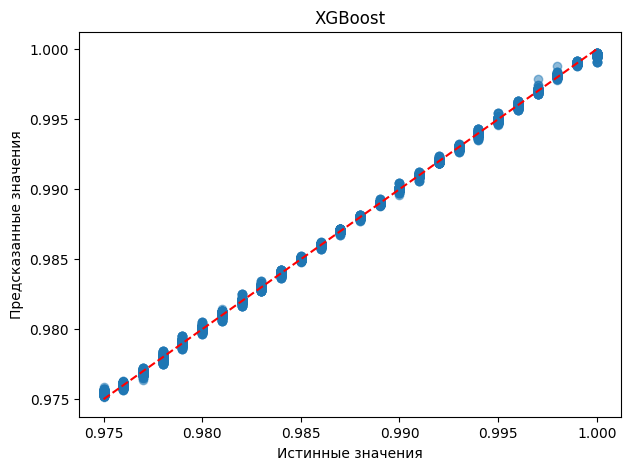

In [81]:
y_test_pred = best_gs_xgb_two.predict(X_test)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('XGBoost')
plt.show()

- XGBoost имеет отличное распределение точек на плоскости, практически все точки на диагональной прямой.

## Scatter Plot - K-Nearest Neighbor

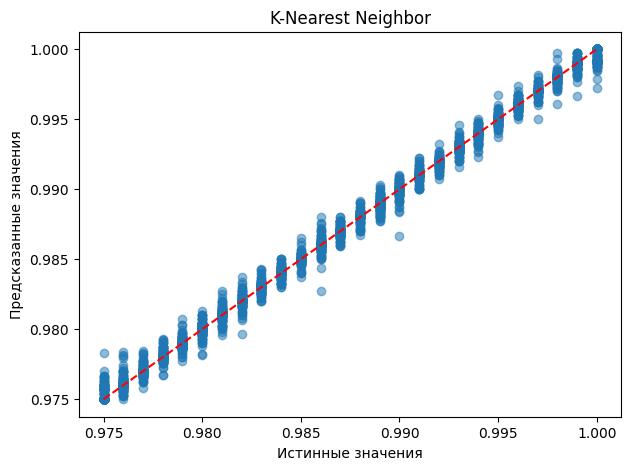

In [82]:
y_test_pred = best_gs_knn2.predict(X_test)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('K-Nearest Neighbor')
plt.show()

- K-Nearest Neighbor так же имеет хорошее распределение точек на плоскости, но заметно, что точки лежат немного хуже, немного откланяются от диагональной прямой по сравнению с XGBoost.

## Scatter Plot - Random Forest

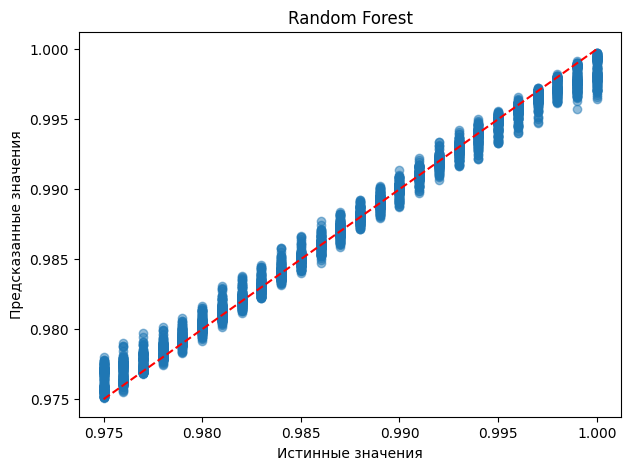

In [83]:
y_test_pred = best_rf_reg2.predict(X_test)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Random Forest')
plt.show()

- У метода Random Forest картинка примерна схожа с методом K-Nearest Neighbor.

## Итог варианта решения №1

- В результате решения первым методом, удаление столбцов в DataFrame производилось не с точки зрения оценки корреляции, а с точки зрения значимости этих столбов для модели ML.
- Даже если столбец сильно кореллирует с другими фичами и не коррелирует с целевой переменной, его мы не удаляем, т.к. он может быть потенциально полезен для модели ML.
    - Возьмем для примера фичу "Ритм магического ядра", которая коррелирует с целевой переменной на -0.00 и сильно коррелирует с другими столбцами. При чистке DataFrame и удалении всех коррелирующих стобцов, чтобы прийти к матрице корреляции которая нас устроит, мы бы попросту избавились от фичи "Ритм магического ядра", как и было сделано в варианте решения №2. Но, с точки зрения важности параметров (было проанализировано выше), эта фича входит в топ-6 параметров по значимости и однозначно вносит свой вклад в более точное обучение ML. Да, мы получаем не совсем красивую матрицу корреляции, но и не удаляем важные фичи для обучения модели.
 
**Результаты**:
```
Метод: Extreme Gradient Boosting
    - Score на тренировочных данных =  0.9995
    - Score на тестовых данных =  0.9993
    - MAE на тестовых данных = 0.0001

Метод: K-Nearest Neighbor
    - Score на тренировочных данных =  1.0
    - Score на тестовых данных =  0.9937
    - MAE на тестовых данных = 0.0005

Метод: Random Forest
    - Score на тренировочных данных =  0.9898
    - Score на тестовых данных =  0.9876
    - MAE на тестовых данных = 0.0006
```

Все модели показали себя очень хорошо! 

**Лучшая модель**:
```
С точки зрения метрики Score и с точки зрения метрики MAE, лучше всего себя показал метод: Extreme Gradient Boosting.

Он имеет как самое высокое значение точности, так и самую быструю скорость обучения.
```

Построен Scatter Plot, на котором показано распределение точек на плоскости, предсказанные и истинные значения. Видим, что большинство точек лежит именно на красной линии, на диагонали, что сведетельствует о точных предсказаниях.

# Вариант №2 - избавляемся от коррелирующих столбцов

- В данном варианте №2, принято решение избавиться от корелирующих и мультиколлинеарных значений, т.к большая кореляция потенциально не очень хорошо влияет на модели. Будем заниматься чисткой данных.

- Еще раз выведем **общую** корреляционную матрицу после добавления **всех** гиперпараметров. 

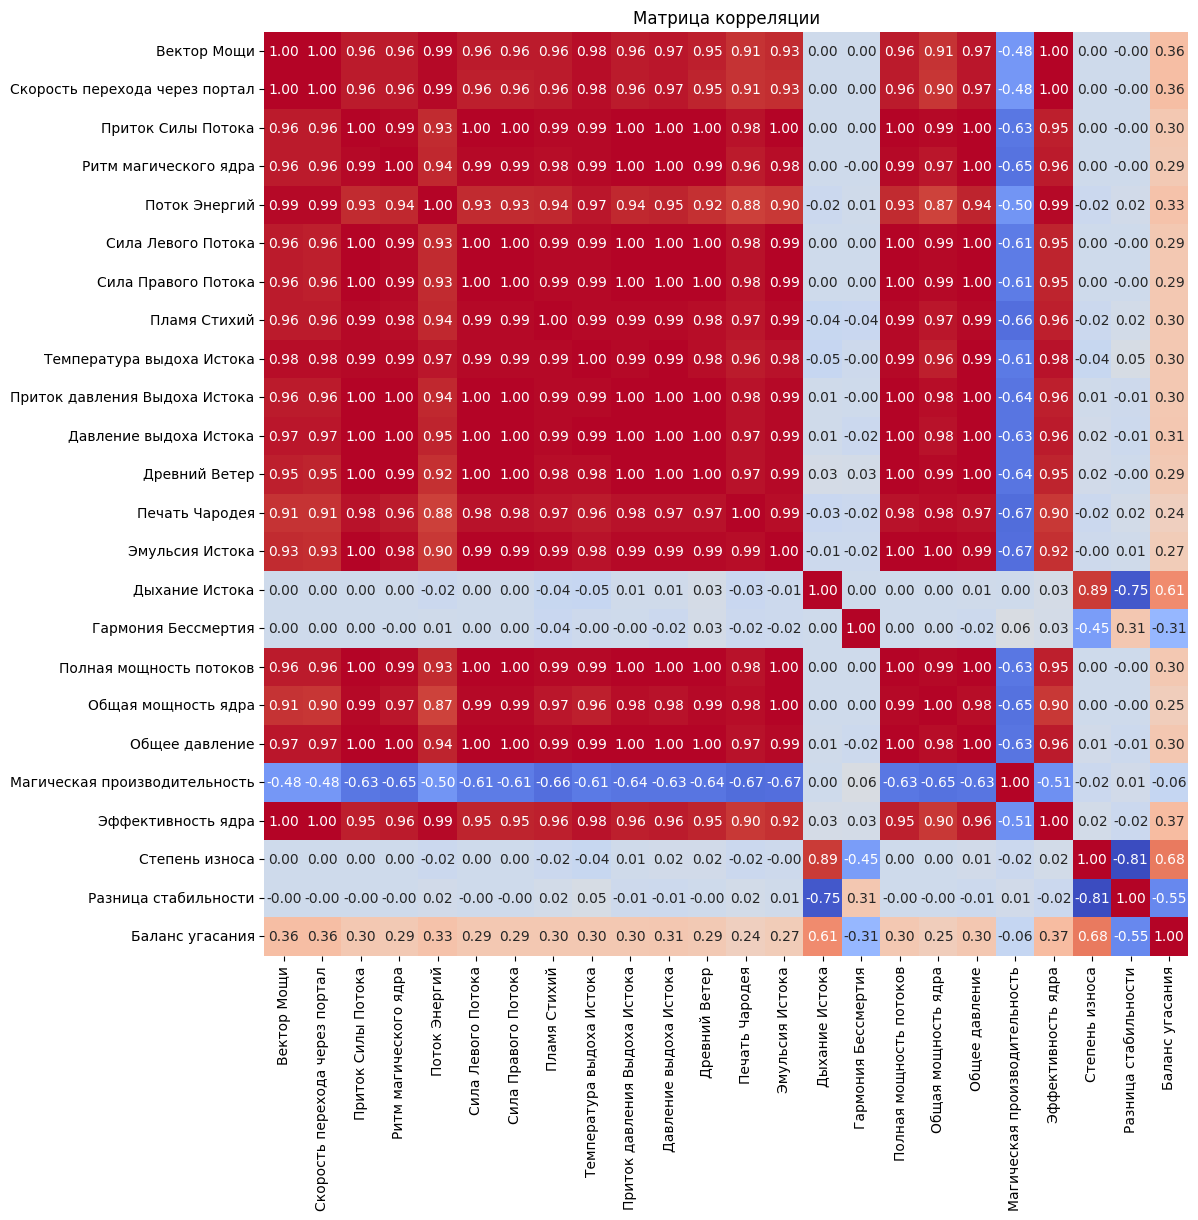

In [84]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

- **Т.к в корелляционной матрице очень много сильно коррелирующих значений, от них нужно избавляться.**

- Для начала удалим параметры, на основе которых были созданы новые столбцы. Т.к они **сильно** коррелируют с новыми столбцами и **слабо** коррелируют с целевой переменной.

- Оценим, что получилось, снова взглянув на матрицу корреляции.

In [85]:
# Удаляем сильно коррелирующие значения
df_new = df_new.drop(['Сила Левого Потока', 'Сила Правого Потока', 'Приток Силы Потока'], axis = 1) # Удаляем, так как на основе этих параметров создан новый "Полная мощность потоков" и они с ним сильно коррелируют.
df_new = df_new.drop(['Ритм магического ядра', 'Эмульсия Истока'], axis = 1) # Удаляем, так как на основе этих параметров создан новый "Эффективность ядра" и они с ним сильно коррелируют.
df_new = df_new.drop(['Температура выдоха Истока', 'Древний Ветер'], axis = 1) # Удалим эти параметры, тк они содержат по 9547 пропусков и коррелируют на значение "1.00" с "Полная мощность потоков"
df_new = df_new.drop(['Приток давления Выдоха Истока', 'Давление выдоха Истока'], axis = 1) # Удалим эти параметры, тк на основе них создан параметр "Общее давление."

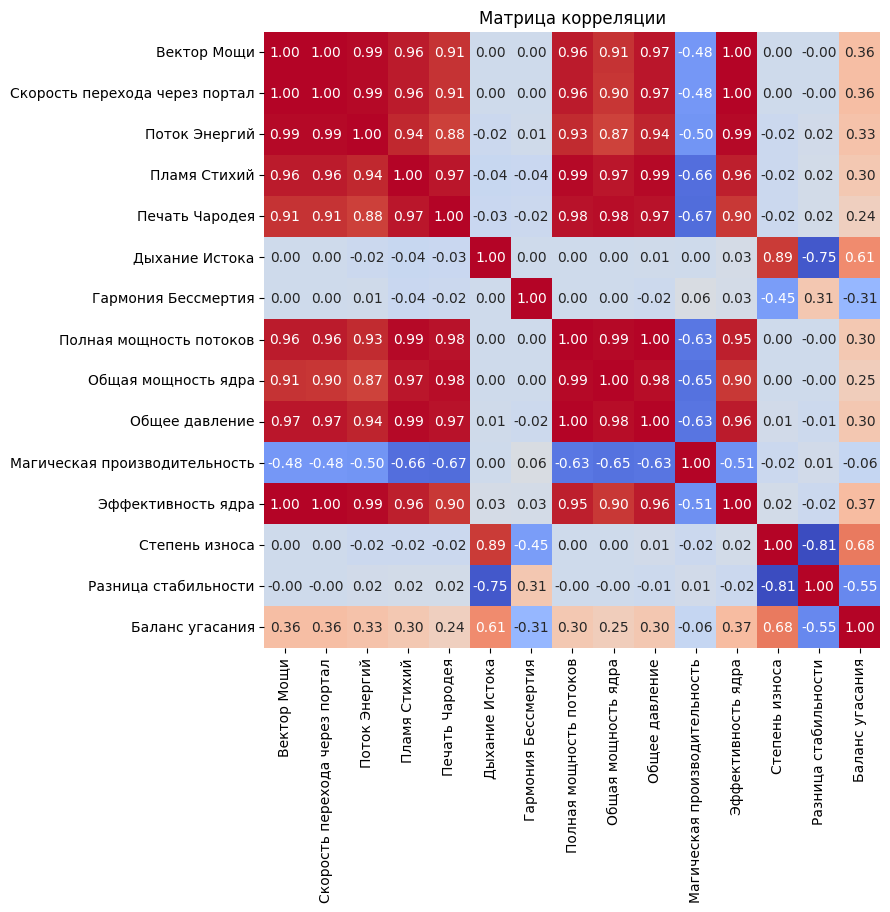

In [86]:
# Оценим корреляцию после частичного удаления коррелирующих переменных.
correlation_matrix = df_new.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

- Ситуация стала немного лучше. Продолжаем удалять стобцы и сильно коррелирующие значения.

In [87]:
# Удаляем сильно коррелирующие значения
df_new = df_new.drop(['Вектор Мощи', 'Скорость перехода через портал', 'Поток Энергий'], axis = 1) # Сильно коррелируют с "Эффективность ядра" и не коррелируют с Целевой переменной.
df_new = df_new.drop(['Пламя Стихий', 'Печать Чародея', 'Полная мощность потоков', 'Общее давление'], axis = 1) # Сильно коррелируют с "Эффективность ядра" и не коррелируют с Целевой переменной.
df_new = df_new.drop(['Дыхание Истока'], axis = 1) # Сильно коррелируют с разными параметрыми и не коррелируют с Целевой переменной.
df_new = df_new.drop(['Разница стабильности'], axis = 1) # Сильно коррелирует с "Степень износа": -0.81

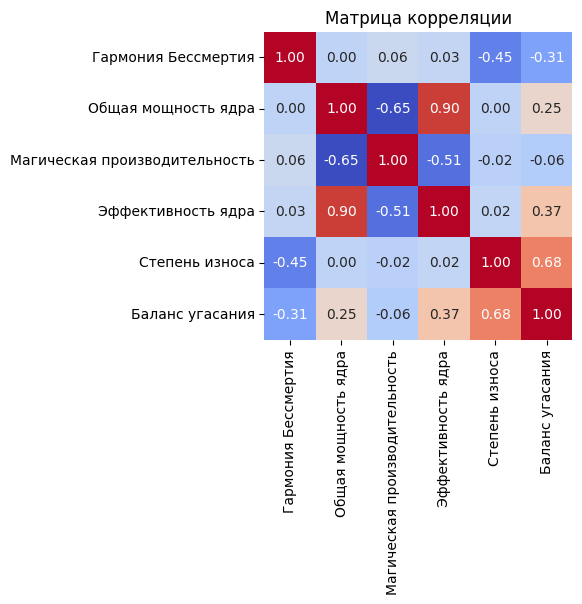

In [88]:
# Оценим корреляцию после частичного удаления коррелирующих переменных.
correlation_matrix = df_new.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

- В корреляционной матрице осталось еще одно **высокое** значение корреляции.
  
    - Это корреляция между 'Общая мощность ядра' и 'Эффективность ядра', равная **0.90**.
 
    - После взвешивания двух параметров, их влияния (корреляции) на целевую переменную 'Гармония Бессмертия', был выбран для удаления параметр, с меньшей корреляцией. Это 'Общая мощность ядра' с корреляцией = 0.00.

In [89]:
df_new = df_new.drop(['Общая мощность ядра'], axis = 1) # Сильно коррелирует с "Эффективность ядра": 0.90 и 0.00 с целевой переменной.

- Полученные **итоговые** значения корреляции приемлемы.

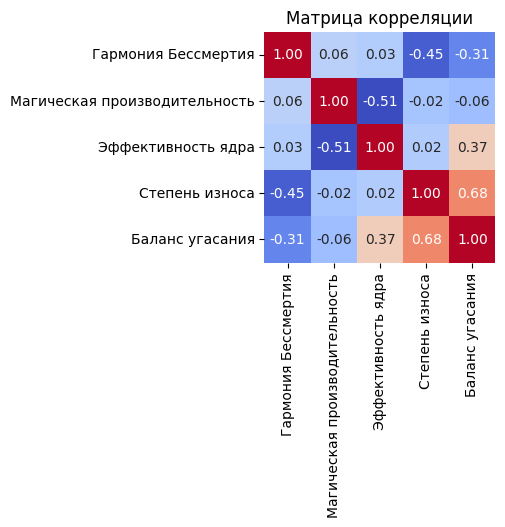

In [90]:
# Оценим корреляцию после Полного удаления коррелирующих переменных.
correlation_matrix = df_new.corr()

plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=False)
plt.title('Матрица корреляции')
plt.show()

- Оценим количество выбросов среди новых столбцов DataFrame.

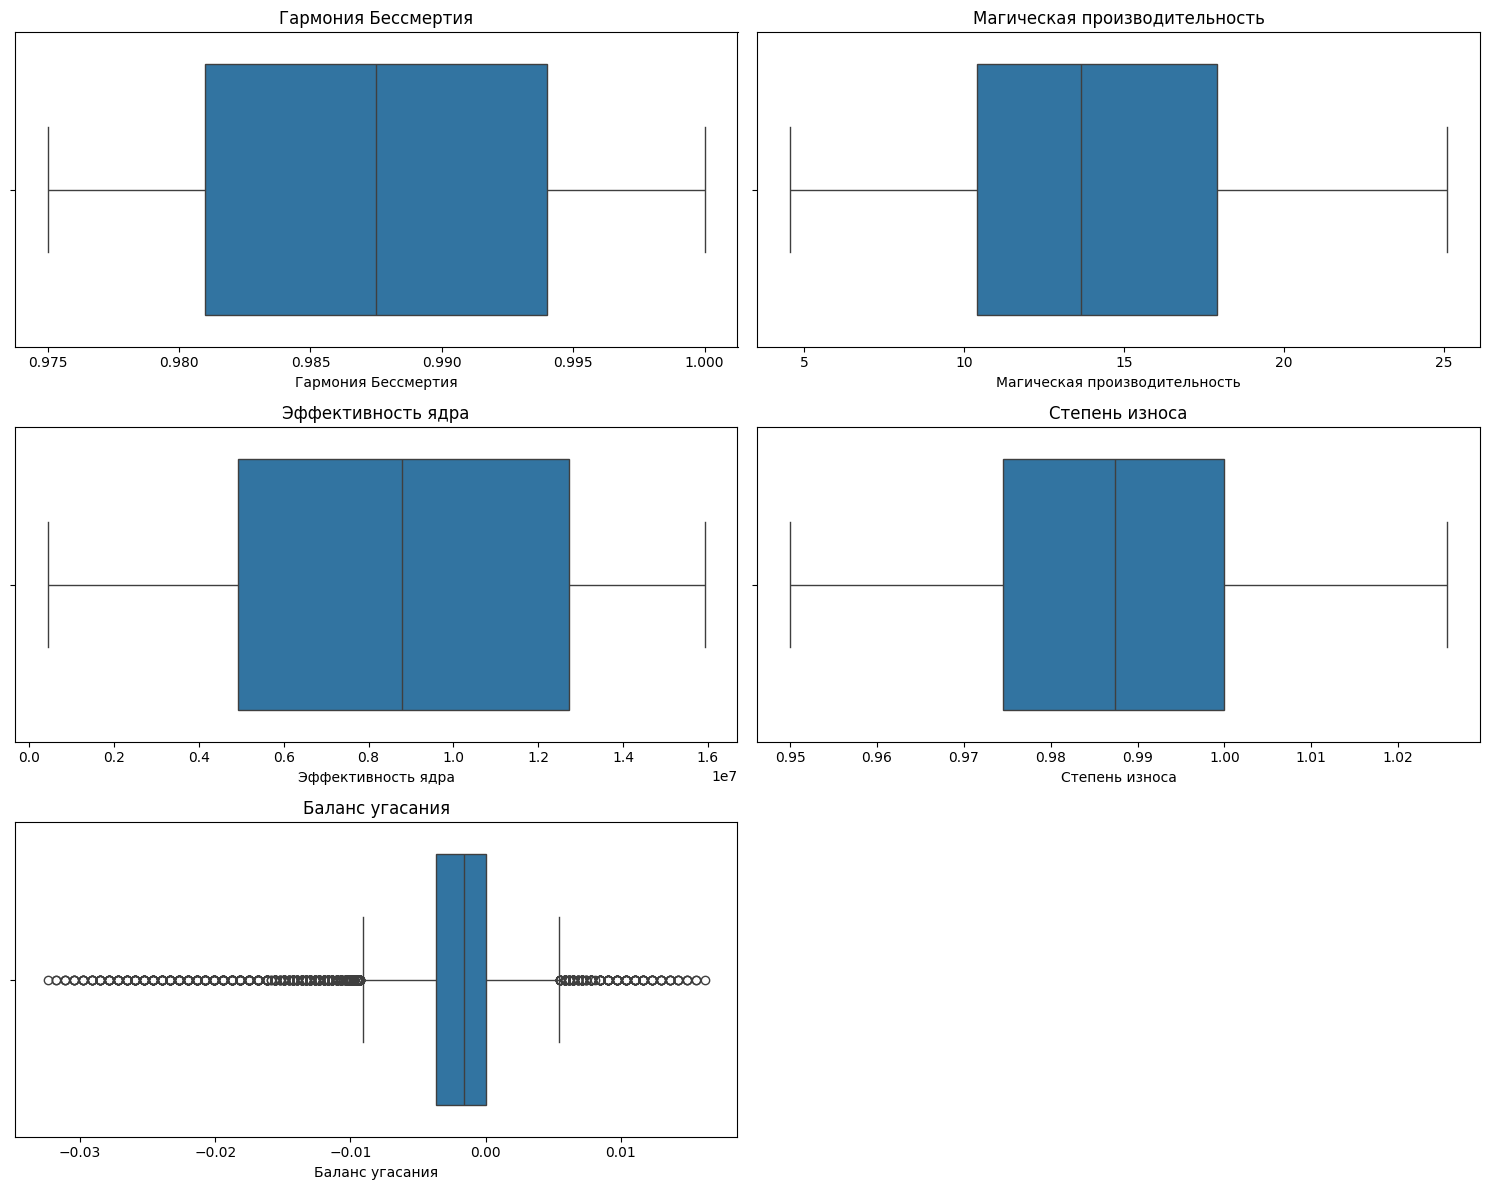

In [91]:
# Построим графики boxplot для каждого столбца нового DataFrame, для оценки выбросов.

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.boxplot(x=df_new['Гармония Бессмертия'], ax=axes[0, 0])
axes[0, 0].set_title('Гармония Бессмертия')

sns.boxplot(x=df_new['Магическая производительность'], ax=axes[0, 1])
axes[0, 1].set_title('Магическая производительность')

sns.boxplot(x=df_new['Эффективность ядра'], ax=axes[1, 0])
axes[1, 0].set_title('Эффективность ядра')

sns.boxplot(x=df_new['Степень износа'], ax=axes[1, 1])
axes[1, 1].set_title('Степень износа')

sns.boxplot(x=df_new['Баланс угасания'], ax=axes[2, 0])
axes[2, 0].set_title('Баланс угасания')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


- Видим, что большое количество выбросов есть у параметра "Баланс угасания".

- Посчитаем их количество.

In [92]:
# Расчитаем количество выбросов для параметра "Баланс угасания"
# Квартиль и межквартильный размах для нашего параметра "Баланс угасания"
Q1 = df_new['Баланс угасания'].quantile(0.25)
Q3 = df_new['Баланс угасания'].quantile(0.75)
IQR = Q3 - Q1

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим сами выбросы
outliers = df_new[(df_new['Баланс угасания'] < lower_bound) | (df_new['Баланс угасания'] > upper_bound)]

# Считаем их количество
num_outliers = outliers.shape[0]

print(f'Количество выбросов параметра "Баланс угасания": {num_outliers}')

Количество выбросов параметра "Баланс угасания": 1098


In [93]:
# Посмотрим, преимущественно какие значения присуще параметру 'Баланс угасания'
df_new['Баланс угасания'].value_counts()

Баланс угасания
 0.000000    234
-0.001296    182
-0.000648    182
-0.002592    164
-0.001944    156
            ... 
-0.003600      1
-0.004628      1
-0.005400      1
-0.010799      1
 0.001800      1
Name: count, Length: 508, dtype: int64

- Выявлено, что большое количество выбросов (1098) у столбца 'Баланс угасания'.

- Появляется необходимость использования **масштабирования данных**, т.к данные выбросы, потенциально могут негативно сказаться на дальнейших моделях ML.

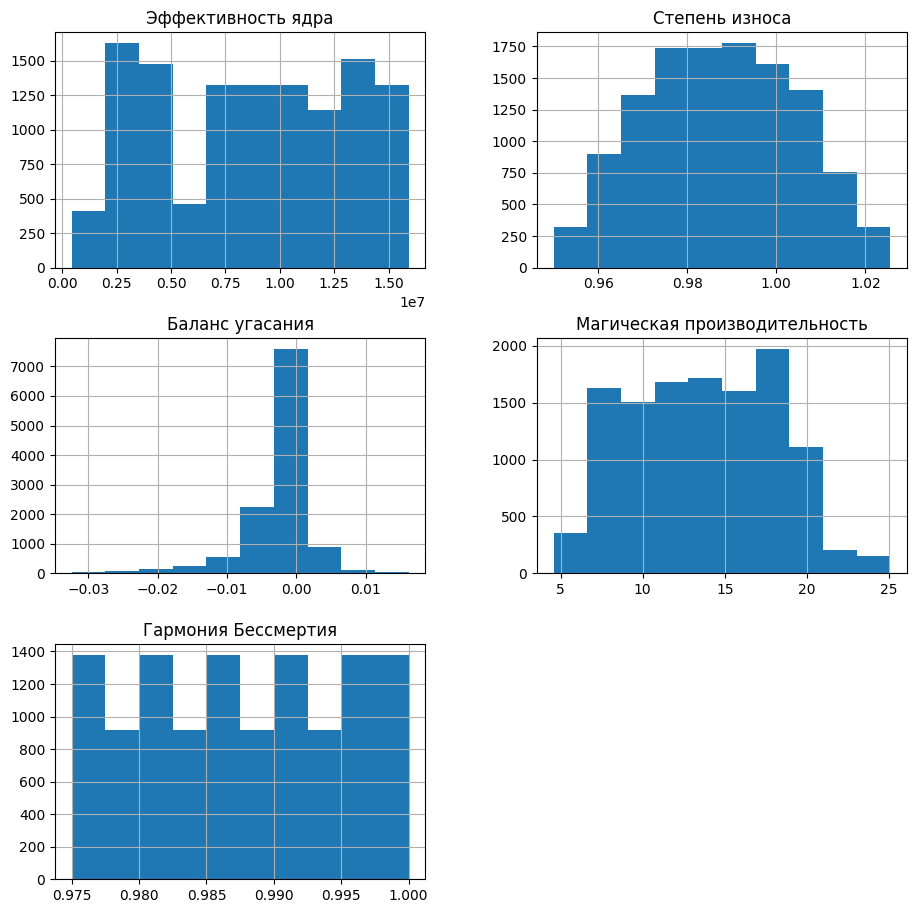

In [94]:
# Смотрим распределение параметров нового DataFrame
features = list(set(df_new))

df_new[features].hist(figsize=(11, 11));

# Видим что распределение параметра 'Баланс угасания', сконцентрировано у значения 0.00

- На графике видно какое не нормальное распределение у "Баланс угасания", из-за большого количества выбросов.

# Machine Learning

## Подготовка данных

In [95]:
# Обозначим целевую переменную и остальные параметры как X и y
X = df_new.drop(['Гармония Бессмертия'], axis = 1)
y = df_new['Гармония Бессмертия']

Проведем масштабирование данных, т.к к примеру, такой параметр, как "Баланс угасания" имеет большое количество выбросов. 

Тем самым, **нормализуем данные** и сделаем их более пригодными для дальнейших алгоритмов, менее заметными (т.к наличие выбросов 
может сильно сказаться на их результатах)


## Масштабирование данных: StandardScaler

In [96]:
# Произведем масштабирование данных
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [97]:
# Разобьем данные на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=150) 

#### Выбор методов ML

Я выбрал 5 методов для решения данной задачи регресии. 

- Решающие деревья
- Случайный лес
- Ближайшие соседи
- Линейная регрессия
- XGBoost

Классический метод линейной регресии, выбрал его для задачи регресии.

Деревья решений, оценим как они справятся с задачей.

Методы ансамблей: Случайный лес и XGBoost. XGBoost - метод быстрее чем Градиентный бустинг, поэтому выбрал его. Случайный лес, как правило более сильный относительно деревьев решений, его необходимо тоже протиестировать.

Ближайшие соседи - оценивая преимущественно какие значения присуще целевой переменной 'Гармония Бессмертия', видно что большая часть значений сконцентрировано очень близко (от 0.975 до 1). Это может выйти сильной стороной для метода ближайшх соседей.

#### Выбор метрики ошибки

- Изначально я оцениваю модель по **коэффициенту детерминации** (score), для тестовых и тренировочных данных.

- Далее оценивается метрика **Mean Absolute Error (MAE)** - среднее значение абсолютной разницы между прогнозами и фактическими наблюдениями. Эта метрика необходима для оценки точности модели и сравнения их между собой.

## Метод 1: Решающие деревья

In [98]:
regres = DecisionTreeRegressor() # Вызываем классификаторю

# В переменной parametrs расписываем все нужные параметры, которые будут перебираться в кросс-валлидации, для выявления лучших из них.
parametrs = {'criterion': ['squared_error'], 'max_depth': range(1, 10), 'max_features': range(1, 10), 'min_samples_leaf': range(1, 20)}

# Прогонка в кросс-валидации классификатора с заданными выше параметрами, разбивая данные df_new на 5 частей. И используя каждую из 5 частей для тестов.
grid_search_cv_regres = GridSearchCV(regres, parametrs, cv = 5)

# Обучаем модель на тренировочных данных.
grid_search_cv_regres.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 20)})

In [99]:
# Посмотрим лучшие параметры, по итогу кросс-валидации.
grid_search_cv_regres.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 3,
 'min_samples_leaf': 6}

In [100]:
# Сохраним эти параметры в новый, "лучший" классификатор.
best_clf = grid_search_cv_regres.best_estimator_

In [101]:
# Оценим значение score на тренировочных и тестовых данных
print('Score на тренировочных данных = ', round(best_clf.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf.score(X_test, y_test), 4))

Score на тренировочных данных =  0.7418
Score на тестовых данных =  0.7292


In [102]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_clf.predict(X_test)

In [103]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [104]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0028


## Метод 2: Случайный лес

In [105]:
reg_forest = RandomForestRegressor()

parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

grid_search_reg_forest = GridSearchCV(reg_forest, parametrs_fr, cv = 5)
grid_search_reg_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [106]:
grid_search_reg_forest.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 200}

In [107]:
best_reg_rf = grid_search_reg_forest.best_estimator_

In [108]:
print('Score на тренировочных данных = ', round(best_reg_rf.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_reg_rf.score(X_test, y_test), 4))

Score на тренировочных данных =  0.8872
Score на тестовых данных =  0.8719


In [109]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_reg_rf.predict(X_test)

In [110]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [111]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0018


## Метод 3: Метод ближайших соседей

In [112]:
knn = KNeighborsRegressor()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn = GridSearchCV(knn, param_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [113]:
grid_search_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [114]:
best_clf_knn = grid_search_knn.best_estimator_

In [115]:
print('Score на тренировочных данных = ', round(best_clf_knn.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_knn.score(X_test, y_test), 4))

Score на тренировочных данных =  1.0
Score на тестовых данных =  0.9578


In [116]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_clf_knn.predict(X_test)

In [117]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [118]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0009


## Метод 4: Линейная Регрессия

In [119]:
lin_reg = LinearRegression()

param_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1]}

grid_search_lr = GridSearchCV(lin_reg, param_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1]})

In [120]:
grid_search_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}

In [121]:
best_lin_reg = grid_search_lr.best_estimator_

In [122]:
print('Score на тренировочных данных = ', round(best_lin_reg.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_lin_reg.score(X_test, y_test), 4))

Score на тренировочных данных =  0.2072
Score на тестовых данных =  0.2211


In [123]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_lin_reg.predict(X_test)

In [124]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [125]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0056


## Метод 5: Extreme Gradient Boosting

In [126]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]}

grid_search_xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [127]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

In [128]:
best_grid_search_xgb = grid_search_xgb.best_estimator_

In [129]:
print('Score на тренировочных данных = ', round(best_grid_search_xgb.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_grid_search_xgb.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9962
Score на тестовых данных =  0.9741


In [130]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_grid_search_xgb.predict(X_test)

In [131]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [132]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0006


- Визуально оценим распределение истинных и предсказанных значений на плоскости.

- Выбрал два самых лучших метода исходя из метрик ошибки (Метод ближайших соседей и Extreme Gradient Boosting).

- Построим для них распределение точен на Scatter Plot.

## Scatter Plot - Метод ближайших соседей

- Оценим визуально распределение предсказанных и истинных значений на графике Scatter Plot.

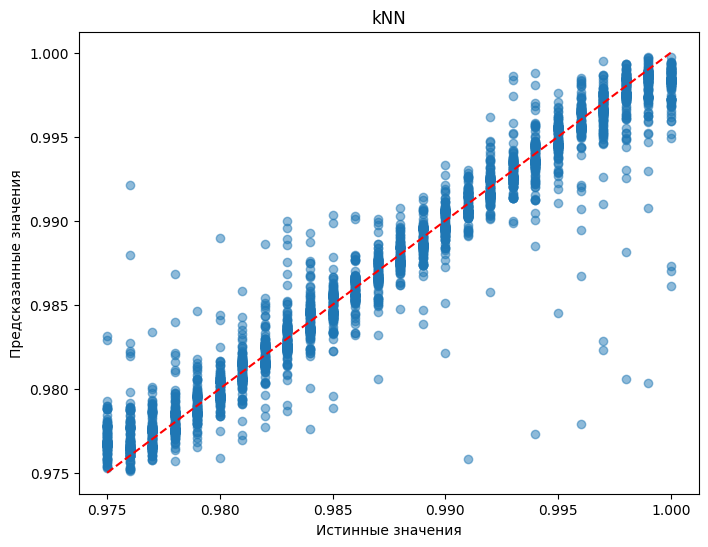

In [133]:
y_test_pred = best_clf_knn.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('kNN')
plt.show()

- Видно определенное количество точек, которые сильно смещены относительно диагонали.

## Scatter Plot - Extreme Gradient Boosting

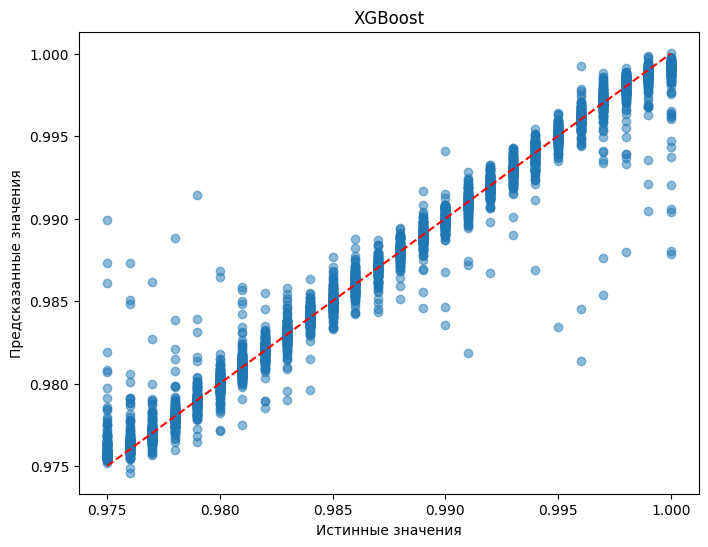

In [134]:
y_test_pred = best_grid_search_xgb.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('XGBoost')
plt.show()

- У XGBoost таких точек, отклюняющихся от диагональной прямой уже меньше. Картина выглядит лучше.

- Это предсказуемо, т.к. MAE у XGBoost меньше чем у метода kNN (0.0006 и 0.0009) соответственно. Это говорит о **меньшей ошибки** предсказанного значения относительно истинного, следовательно и отклонение точки от красной диагональной прямой меньше, как по количеству, так и по удаленности от нее.

## Масштабирование данных: RobustScaler 

Имея выбросы только в одном параметре 'Баланс угасания'. Попробуем провести масштабироване только одной переменной спользуя 
"RobustScaler". 

RobustScaler - масштабирует данные, используя медиану и интерквартильный размах, что делает его менее чувствительным к выбросам. 

StandardScaler, использует среднее и стандартное отклонение. При наличии выбросов в данных стандартное шкалирование может быть неэффективным, т.к оно чувствительно к экстремальным значениям. Стандартное отклонение и среднее сильно смещаются выбросами, что приводит к некорректному масштабированию остальных значений.

Протестируем вариант масштабирования с помощью "RobustScaler".

In [135]:
X_new = df_new.drop(['Гармония Бессмертия', 'Баланс угасания'], axis = 1)
y_new = df_new['Гармония Бессмертия']

In [136]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_new)

In [137]:
# Преобразуем результат обратно в DataFrame.
X_scaled = pd.DataFrame(X_scaled, columns=X_new.columns)

In [138]:
# Произведем масштабирование данных только переменной 'Баланс угасания'
scaler_rob = RobustScaler()

balance_sc = scaler_rob.fit_transform(df_new[['Баланс угасания']])

X_scaled['Баланс угасания'] = balance_sc

In [139]:
# Разобьем данные на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size = 0.33, random_state=200) 

## Метод 1: Решающие деревья

In [140]:
regres_two = DecisionTreeRegressor()

parametrs = {'criterion': ['squared_error'], 'max_depth': range(1, 10), 'max_features': range(1, 10), 'min_samples_leaf': range(1, 20)}

grid_search_cv_regres_two = GridSearchCV(regres_two, parametrs, cv = 5)
grid_search_cv_regres_two.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 20)})

In [141]:
grid_search_cv_regres_two.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 7,
 'min_samples_leaf': 4}

In [142]:
best_clf_two = grid_search_cv_regres_two.best_estimator_

In [143]:
print('Score на тренировочных данных = ', round(best_clf_two.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_two.score(X_test, y_test), 4))

Score на тренировочных данных =  0.7553
Score на тестовых данных =  0.7346


In [144]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_clf_two.predict(X_test)

In [145]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [146]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0028


## Метод 2: Случайный лес

In [147]:
reg_forest_two = RandomForestRegressor()

parametrs_fr = {'max_depth':[3, 5, 10],
              'n_estimators':[10, 100, 200],
              'max_features':[1, 3, 5, 7]}

grid_search_reg_forest_two = GridSearchCV(reg_forest_two, parametrs_fr, cv = 5)
grid_search_reg_forest_two.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'n_estimators': [10, 100, 200]})

In [148]:
grid_search_reg_forest_two.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 100}

In [149]:
best_reg_rf_two = grid_search_reg_forest_two.best_estimator_

In [150]:
print('Score на тренировочных данных = ', round(best_reg_rf_two.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_reg_rf_two.score(X_test, y_test), 4))

Score на тренировочных данных =  0.889
Score на тестовых данных =  0.8713


In [151]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_reg_rf_two.predict(X_test)

In [152]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [153]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0018


## Метод 3: Метод ближайших соседей

In [154]:
knn_two = KNeighborsRegressor()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn_two = GridSearchCV(knn_two, param_knn, cv=5)
grid_search_knn_two.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [155]:
grid_search_knn_two.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [156]:
best_clf_knn_two = grid_search_knn_two.best_estimator_

In [157]:
print('Score на тренировочных данных = ', round(best_clf_knn_two.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_clf_knn_two.score(X_test, y_test), 4))

Score на тренировочных данных =  1.0
Score на тестовых данных =  0.9465


In [158]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_clf_knn_two.predict(X_test)

In [159]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [160]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.001


## Метод 4: Extreme Gradient Boosting

In [161]:
xgb_regressor_two = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]}

grid_search_xgb_two = GridSearchCV(xgb_regressor_two, param_xgb, cv=5)

grid_search_xgb_two.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [162]:
grid_search_xgb_two.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

In [163]:
best_grid_search_xgb_two = grid_search_xgb_two.best_estimator_

In [164]:
print('Score на тренировочных данных = ', round(best_grid_search_xgb_two.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_grid_search_xgb_two.score(X_test, y_test), 4))

Score на тренировочных данных =  0.9962
Score на тестовых данных =  0.9774


In [165]:
# Расчитываем среднюю абсолютную ошибку (Mean Absolute Error - MAE)
y_test_pred = best_grid_search_xgb_two.predict(X_test)

In [166]:
mae_test = mean_absolute_error(y_test, y_test_pred)

In [167]:
print('MAE на тестовых данных =', round(mae_test, 4))

MAE на тестовых данных = 0.0006


- Построим графики Scatter Plot для визуализации точности истинных и предсказанных значений.

- Я выбрал **два** метода, которые показали себя лучше всего по метрике качества:

    -  Метод ближайших соседей
    -  Extreme Gradient Boosting

## Scatter Plot - Метод ближайших соседей

- Оценим визуально распределение предсказанных и истинных значений на графике Scatter Plot.

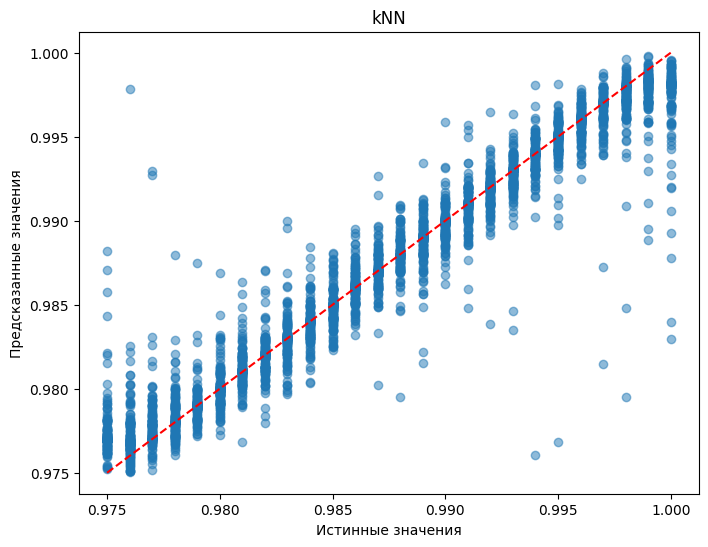

In [168]:
y_test_pred = best_clf_knn_two.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('kNN')
plt.show()

- Картина у метода kNN стала немного хуже, это связано с увеличением MAE, что свидетельствует о более сильном отклонении точек. 

## Scatter Plot - Extreme Gradient Boosting

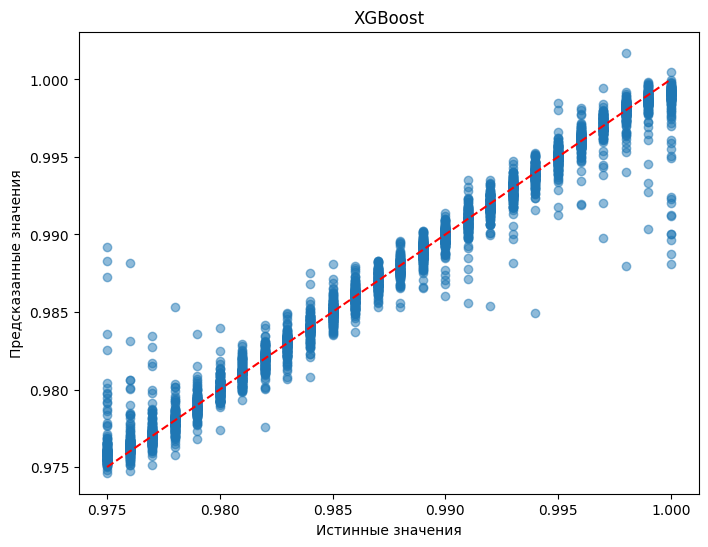

In [169]:
y_test_pred = best_grid_search_xgb_two.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('XGBoost')
plt.show()

- Картина у XGBoost с изменением масштабирования данных, визуально не поменялась, как и показатель MAE.

## Итог варианта решения №2

- Вариант решения №2 заключался в том, чтобы добиться максимально приемлемой корреляционной матрицы. Уйти от той матрицы корреляции, где практически все параметры были мультиколлинеарны и прийти к матрице, где все парраметры приемлемо коррелируют друг с другом. В нашем случае максимальная корреляция составила 0.68, что вполне приемлемо.

- Исключение столбцов из DataFrame основывалось на сильной корреляции с другими параметрами и слабой корреляции с целевым столбцом. Изначально удалялись столбцы, из которых получились гиперпараметры (новые столбцы). Ведь при создании гиперпараметра, составляющие его столбцы будут сильно коррелировать с ним, следовательно они будут удалены.

- Также протестированы 2 метода масштабирования данных: StandardScaler и RobustScaler. Необходимо было понять, как два разных метода масштабирования повлияют на результаты методов ML. Причиной этому было, большое количество выбросов параметра "Баланс угасания". Считалось, что стандартное масштабирование StandardScaler, может быть некомпетентно в данной ситуации.


**Результаты:**

**1. Масштабирование: StandardScaler**

```
Метод: Решующие деревья
    - Score на тренировочных данных =  0.7418
    - Score на тестовых данных =  0.7292 
    - MAE на тестовых данных = 0.0028

Метод: Random Forest
    - Score на тренировочных данных =  0.8872
    - Score на тестовых данных =  0.8719
    - MAE на тестовых данных = 0.0018

Метод: K-Nearest Neighbor
    - Score на тренировочных данных =  1.0
    - Score на тестовых данных =  0.9578
    - MAE на тестовых данных = 0.0009

Метод: Линейная Регрессия
    - Score на тренировочных данных =  0.2072
    - Score на тестовых данных =  0.2211
    - MAE на тестовых данных = 0.0056

Метод: Extreme Gradient Boosting
    - Score на тренировочных данных =  0.9962
    - Score на тестовых данных =  0.9741 
    - MAE на тестовых данных = 0.0006
```

**2. Масштабирование: RobustScaler**

```
Метод: Решующие деревья
    - Score на тренировочных данных =  0.7553
    - Score на тестовых данных =  0.7346
    - MAE на тестовых данных = 0.0028

Метод: Random Forest
    - Score на тренировочных данных =  0.889
    - Score на тестовых данных =  0.8713
    - MAE на тестовых данных = 0.0018

Метод: K-Nearest Neighbor
    - Score на тренировочных данных =  1.0
    - Score на тестовых данных =  0.9465
    - MAE на тестовых данных = 0.001

Метод: Extreme Gradient Boosting
    - Score на тренировочных данных =  0.9962
    - Score на тестовых данных =  0.9774
    - MAE на тестовых данных = 0.0006
```


- Изменение метода масштабирования (RobustScaler), не дало особо никаких плодов. Сюдя по результатам, показатели моделей наоборот немного ухудшились.

**Лучшая модель**

```
Лучше всего себя показал метод Extreme Gradient Boosting. У него самые высокие показатели точности (коэффициент детерминации - score и метрика ошибки - MAE). Также у данного метода, самая высокая скорость обучения, не считая линейную регрессию (которая показала себя не совсем с лучшей стороны). На изменении масштабирования результаты сильно не поменялись, на тестовых данных при методе RobustScaler, результаты немного выросли.
```

# Итоги - Выбор модели

В данной работе было протестировано **два** абсолютно разных подхода к решению регрессионной задачи.


В **первом варианте** решения был протестирован подход, неудаления корреляционных столбцов в пурвую очередь.
```
Видно, что обобщенная матрица корреляции, после добавления всех гиперпараметров, имела очень много мультиколинеарных и колинеарных значений (мультиколинеарные - это значения с коэфициентом кореляции меньше единицы и больше 0.7-0.8. А значения с коэфициентом кореляции равным 1 или -1 называются коллинеарными).

Была проделана работа по выявлению важности и значимости параметров, перед их удалением.
```


Во **втором варианте** решения данной регресионной задачи, была проделана большая работа с корреляционной матрицей. Необходимо было привести ее к нормальным значениям корреляции.
```
Как было указано в итоге варианта решения №2 (Исключение столбцов из DataFrame основывалось на сильной корреляции с другими параметрами и слабой корреляции с целевым столбцом. Изначально удалялись столбцы, из которых получились гиперпараметры. Ведь при создании гиперпараметра, составляющие его столбцы будут сильно коррелировать с ним, следовательно они будут удалены). Большее предпочтение отдавалось именно гиперпараметру, т.к. он состоит из нескольких обычных столбцов и потенциально может нести больше информации для модели, поэтому удалялись сильно коррелирующие столбцы именно с гиперпараметром.

Удаляя эти столбцы, мы приводили матрицу корреляции к удовлетворяющему нас виду.

Но, самая основная проблема и недостаток этого метода, заключается в том, что нет никакой информации о том, что гиперпараметр более важен для нас, чем составляющие его столбцы. Удаляя эти столбцы, мы можем потерять важный для нас признак даже не зная об этом.
```

- Исходя из анализа важности столбцов для моделей, в варианте решения №1, видно, что **топ параметов** как для модели Extreme Gradient Boosting, так и для моделей Random Forest и CatBoost **неизменен**. Это такие параметры как (**Разница стабильности, Степень износа, Дыхание Истока, Баланс угасания**). Значит, эти параметры очень важны для представленных моделей, и при отсутствии их, модели вероятнее всего, обучатся менее эффективно (как это и произошло).

- При решении задачи методом №2, в процессе "чистки данных", касательно матрицы корреляции, были удалены такие столбцы как (**Разница стабильности, Дыхание Истока**). Это значит, что **были удалены** параметры по важности, входящие в **топ3** (ранее, в варианте решения №1, я написал, что 4 параметра обязательно должны быть в DataFrame, они вносят самый большой вклад в модель и в решение в целом. Решая вторым вариантом задачу, 2 самых важных параметра были удалены), хотя это было абсолютно не очевидно, казалось, что это обычные коррелирующие столбцы, собственно, как и все. Этот ход существенно повлиял на результаты.

Все это говорит о том, что решая задачу методом №2, **трудно** обьективно **аргументировать** выбор, **что же удалять** между несколькими сильно коррелирующими столбцами. Мы можем **не угадать** и удалить **важный** признак.

Решая задачу вариантом решения №1, мы можем абсолютно точно быть **уверены** в том, что никакие **важные** признаки **удалены не были**. Хоть матрица корреляции все-таки и получилась неудовлетворяющей нас, но чистить ее уже нет никакого смысла, ведь в нее входят все самые важные параметры.
```
```
**Выбор лучшего решения:**

```
В качестве лучшего решения выбираю вариант №1 - необходимо удостовериться и быть полностью уверенным в том, что удаляемый признак может быть спокойно удален без дальнейшего ущерба.
```

```
```
**Выбор лучшей модели:**

```
В качестве лучшей модели выступил метод: Extreme Gradient Boosting.

Он смог адаптироваться и быстро обучиться на большом наборе сильно коррелирующих столбцов. Показал лучший показатель score и минимальную метрику ошибки MAE. Хорошо показал себя на кросс-валидации, с высоким средедним значением R^2, с низкими значениями стандартного отклонения R^2, с низким среднем значением MAE и с низким стандартным отклонением MAE, что говорит о надежности данной модели. Так же XGBoost имеет лучшее распределение на Scatter Plot.

В сочетании с решением №1, метод Extreme Gradient Boosting имеет показатели:
```
**- Score на тренировочных данных =  0.9995**

**- Score на тестовых данных =  0.9993**

**- MAE на тестовых данных = 0.0001**
```
При оценивании распределения точек на Scatter Plot, для данного метода, видно, что практически все точки лежат на диагональной прямой, что сведетельствует о совпадении истинных и предсказанных значений.
```

## Сложности при решении

- Основная сложность задачи была из-за высокой мультиколлинеарности между признаками. Необходимо было удалить множество столбцов, и аргументировать это, чтобы добиться допустимых значений корреляции. 

- Вызвали вопросы значения 'Исток не вернул выдох' и 'Древний Ветер развеялся'. Изначально было несовсем понятно, как интерпретировать их, и аргументировать перенос их к пропущенным значениям. Пришлось провести анализ этих явлений, выяснить что количество этих явлений одинаково между собой, что эти явления происходят строго параллельно, проанализировать, что это может быть в реальной жизни (т.к данная задача - это реальный кейс).

- Вызвали сложности большое количество пропущенных значений в столбцах "Температура вдоха Истока" и "Давление вдоха Истока". Было непонятно что с ними делать, до момента построения корреляционный матрицы. Были мысли о замене их на средние и медианные значения.


Пришлось додумать другой вариант решения (вариант решения №1). При удалении сильно коррелирующих столбцов были сомнения о правильности действий, ведь было удалено большое количество данных, которые на самом деле могут быть полезны.

Были мысли о том, как бы не переобучить модель, когда показатели score равнялись 1. Как это получилось и с методом ближайших соседей. Было придумано, написасть цикл и прогнать модель несколько раз с разными значениями random_state, для тестирования модели на данных после перемешивания и так же использовать кросс-валидацию и оценить результаты на метриках ошибки.